## **CAPSTONE PROJECT**

### **PROJECT TITLE**
**LOAN DEFAULT RISK PREDICTION**
>  #### The Challenge: **Navigating Loan Risk**
Financial institutions face significant challenges in accurately assessing loan default risk. Traditional methods often fall short in tod

#### **PROBLEM STATEMENT**
Develop a robust machine learning pipeline to predict loan default risk, enabling better credit decisions and minimizing financial losses.
>  #### **Objective**
Utilize customer behavioral and financial data to build a predictive model, enhancing accuracy and efficiency in risk assessment.

#### **UNDERSTANDING OUR DATASET**
Our analysis relies on a comprehensive dataset, simulating real-world loan application scenarios to capture critical indicators of default risk.

| Category      | Features                                                                 |
|---------------|--------------------------------------------------------------------------|
| **Performance** | customerid, systemloanid, loannumber, approveddate, creationdate, loanamount, totaldue, termdays, referredby, good_bad_flag                |
| **Demographics**    | customerid, birthdate, bank_account_type, longitude_gps, latitude_gps, bank_name_clients, bank_branch_clients, employment_status_clients, level_of_education_clients |
| **Previous Loan**   |  customerid, systemloanid, loannumber, approveddate, creationdate, loanamount, totaldue, termdays, closeddate, referredby, firstduedate, firstrepaiddate  |
| **Target**       | Loan Default (0: Bad, 1: Good)                                            |

#### **DATASET OVERVIEW**

##### **Loan Performance (Current Loan)**
- **customerid** — Unique identifier of each customer.
- **systemloanid** — Unique identifier of each loan taken.
- **loannumber** — The number of loans taken by a customer.
- **approveddate** — Date when the loan was approved.
- **creationdate** — Date when the loan was created / applied.
- **loanamount** — Amount of loan given to a customer.
- **totaldue** — Total amount to be repaid.
- **termdays** — Length of the loan (in days).
- **referredby** — Unique identifier of the source the customer came through.
- **good_bad_flag** — Loan default status flag.

##### **Customer Demographics**
- **customerid** — Unique identifier of each customer.
- **birthdate** — Date of birth of each customer.
- **bank_account_type** — Customer's account type (e.g., savings, current).
- **longitude_gps** — Customer's longitude coordinate (location).
- **latitude_gps** — Customer's latitude coordinate (location).
- **bank_name_clients** — Customer’s bank name.
- **bank_branch_clients** — Customer’s bank branch.
- **employment_status_clients** — Customer’s employment status.
- **level_of_education_clients** — Customer's education level.

##### **Previous Loan**
- **customerid** — Unique identifier of each customer.
- **systemloanid** — Unique identifier of each loan previously taken.
- **loannumber** — The number of loans taken by a customer previously.
- **approveddate** — Date when the loan was approved.
- **creationdate** — Date when the loan was created / applied.
- **loanamount** — Amount of loan previously given to a customer.
- **totaldue** — Total amount that was repaid.
- **termdays** — Length of the previous loan (in days).
- **closeddate** — Date when the loan was closed or settled.
- **referredby** — Unique identifier of the source the customer came through.
- **firstduedate** — First scheduled repayment date.
- **firstrepaiddate** — Actual date of first repayment.

#### **PROCEDURES**
- **IMPORTED ALL NECESSARY LIBRARIES**
- **DATA COLLECTION AND PREPARATION**
```
Imported all three datasets
Inspected all the data
Performed data cleaning (missing values, duplicates, datatypes, e.t.c)
Merged all datasets
```
- **FEATURE ENGINEERING**
```
Created age feature
Dropped features not useful for prediction
```
- **EXPLORATORY DATA ANALYSIS (EDA)**
```
Handled missing values
Visualized the target column to check for class imbalance
Generated and visualized 9 insights from the data with appropriate charts
```
- **DATA PREPROCESSING**
```
Separated the data into features and target
Created a preprocessing pipeline
```
- **MODEL DEVELOPMENT**
```
Splitted the dataset into training and testing sets using train_test_split
Created a function to train and evaluate our models
Defined 5 models for training
```
- **MODEL EVALUATION**
```
Trained and evaluated the 5 models using our function
```
- **MULTICOLLINEARITY AND CLASS IMBALANCE**
```
Applied Variance Inflation Factor (VIF) to measure multicollinearity
Dropped highly correlated features
Applied SMOTE oversampling to handle class imbalance
Retrained and evaluated our models on resampled data
```
- **HYPERPARAMETER TUNING AND EVALUATION**
```
Tuned LightGBM model using RandomizedSearchCV
Tuned XGBoost model using GridSearchCV
Retrained and evaluated the models on tuned parameters
```
- **RECOMMENDATIONS FOR DEPLOYMENT**
- **FINAL MODEL**
- **FEATURE IMPORTANCE**
```
Visualized features contributing more to our model performance
```
- **SAVED THE MODEL**
- **RECOMMENDATIONS FOR IMPROVEMENT**

In [1]:
# importing necessary libraries

# importing libraries for data manipulation
import pandas as pd
import numpy as np

# importing libraries for data visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use("ggplot")

# importing date & time
from datetime import datetime
import time

# importing warnings to filter/ignore warnings from the output, if any
import warnings
warnings.filterwarnings("ignore")

# importing machine learning libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    auc
)

# importing module for saving our model
import joblib

#### **DATA COLLECTION AND PREPARATION**

In [2]:
# links to the datasets
url1 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'
url2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
url3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'

* **DATA IMPORTATION**

In [3]:
# importing / loading our datasets

loan_perf = pd.read_csv(url2)    # loan performance dataset
demo = pd.read_csv(url3)         # customer demographics dataset
prev_loan = pd.read_csv(url1)    # previous loan dataset


* **INITIAL DATA INSPECTION**
> **1). Inspecting the loan performance dataset**

In [4]:
# viewing the first five rows of the data
loan_perf.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-05 17:04:41.000000  2017-07-05 16:04:18.000000     15000.0   
2  2017-07-06 14:52:57.000000  2017-07-06 13:52:51.000000     20000.0   
3  2017-07-27 19:00:41.000000  2017-07-27 18:00:35.000000     10000.0   
4  2017-07-03 23:42:45.000000  2017-07-03 22:42:39.000000     40000.0   

   totaldue  termdays referredby good_bad_flag  
0   34500.0        30        NaN          Good  
1   17250.0        30        NaN          Good  
2   22250.0        15        NaN          Good  
3   11500.0        15        NaN          Good  
4   44000.0        30        NaN          Good

In [5]:
# checking the size of the data
loan_perf.shape

(4368, 10)

In [6]:
# inspecting the column names in the dataset
loan_perf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [7]:
# checking the overall information of the dataset, including datatypes
loan_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [8]:
# checking for duplicates
loan_perf.duplicated().sum()

np.int64(0)

In [9]:
# checking for duplicates on custimerid
loan_perf["customerid"].duplicated().sum()

np.int64(0)

In [10]:
# checking for missing values
loan_perf.isna().sum().sort_values(ascending=False)

referredby       3781
customerid          0
systemloanid        0
loannumber          0
creationdate        0
approveddate        0
loanamount          0
totaldue            0
termdays            0
good_bad_flag       0
dtype: int64

In [11]:
# checking the percentage of missing values
((loan_perf.isna().sum()/len(loan_perf))*100).sort_values(ascending=False)

referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
creationdate      0.000000
approveddate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64

##### **OBSERVATIONS FROM INSPECTING THE LOAN PERFORMANCE DATASET**
- Dataset is having `4,368` rows and `10` columns
- There are no duplicates
- There are data type issues on `approveddate` and `creationdate` column
- There are missing values in the `referredby` column

##### **SOLUTIONS**
- Convert the datatype of `approveddate` and `creationdate` column to `datetime`
- Handle missing values by dropping the `referredby` column because it has about `86%` of missing rows which makes it irrelevant due to excess data loss

In [12]:
# Converting approveddate and creationdate column to datetime
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'], errors="coerce")
loan_perf['creationdate'] = pd.to_datetime(loan_perf['creationdate'], errors="coerce")

In [13]:
# Handling missing values by dropping the referredby column
loan_perf = loan_perf.drop("referredby", axis=1)

In [14]:
# re-checking for missing values & confirming if referredby column has been dropped
loan_perf.isna().sum()

customerid       0
systemloanid     0
loannumber       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
good_bad_flag    0
dtype: int64

In [15]:
# re-checking for duplicates
loan_perf.duplicated().sum()

np.int64(0)

In [16]:
# re-checking for duplicates in the customerid
loan_perf["customerid"].duplicated().sum()

np.int64(0)

In [17]:
# re-checking the overall information of the dataset to confirm the data types correction
loan_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 307.3+ KB


**Feature Construction on Loan Performance Dataset**
- Creating new features from existing features in the loan performance dataset to prepare the data for EDA and merging with other datasets
- We are going to create features such as;
> 1. Interest
> 2. Interest Rate (%)
> 3. Loan Term

In [18]:
# creating interest column
loan_perf["interest"] = loan_perf["totaldue"] - loan_perf["loanamount"]

In [19]:
# creating interest rate column
loan_perf["interest_rate(%)"] = (loan_perf["interest"] / loan_perf["loanamount"]) * 100

In [20]:
# creating loan term column
loan_perf["loan_term"] = pd.cut(loan_perf["termdays"], bins=[0, 30, 90], labels=["Short Term", "Long Term"])

In [21]:
# viewing the dataset
loan_perf.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-05 17:04:41 2017-07-05 16:04:18     15000.0   17250.0        30   
2 2017-07-06 14:52:57 2017-07-06 13:52:51     20000.0   22250.0        15   
3 2017-07-27 19:00:41 2017-07-27 18:00:35     10000.0   11500.0        15   
4 2017-07-03 23:42:45 2017-07-03 22:42:39     40000.0   44000.0        30   

  good_bad_flag  interest  interest_rate(%)   loan_term  
0          Good    4500.0             15.00  Short Term  
1          Good    2250.0             15.00  Short Term  
2          Good    2250.0             11.25  Short Term  
3          Good    1500.0             15.00  Short Term  
4          Good    4000.0             10.00  Short Term

In [22]:
# checking the info of the new dataset
loan_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        4368 non-null   object        
 1   systemloanid      4368 non-null   int64         
 2   loannumber        4368 non-null   int64         
 3   approveddate      4368 non-null   datetime64[ns]
 4   creationdate      4368 non-null   datetime64[ns]
 5   loanamount        4368 non-null   float64       
 6   totaldue          4368 non-null   float64       
 7   termdays          4368 non-null   int64         
 8   good_bad_flag     4368 non-null   object        
 9   interest          4368 non-null   float64       
 10  interest_rate(%)  4368 non-null   float64       
 11  loan_term         4368 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 379.9+ KB


**2). Inspecting the customer demographics dataset**

In [23]:
# viewing the first five rows of the data
demo.head()

customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858efd5ca70688015cabd1f1e94b55  1991-07-19 00:00:00.000000   
4  8a858e785acd3412015acd48f4920d04  1982-11-22 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       3.362850      6.642485           GT Bank   
4           Savings       8.455332     11.971410           GT Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  
0                 NaN                       NaN                        NaN  
1                 NaN                 Permanent                        NaN  
2                 NaN                       NaN                        NaN  
3                 NaN                 Permanent                        NaN  
4                 NaN                 Permanent                        NaN

In [24]:
# checking the size of the data
demo.shape

(4346, 9)

In [25]:
# inspecting the column names in the dataset
demo.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [26]:
# checking for duplicates
demo.duplicated().sum()

np.int64(12)

In [27]:
# checking for duplicates in the customerid
demo["customerid"].duplicated().sum()

np.int64(12)

In [28]:
# checking for missing values
demo.isna().sum().sort_values(ascending=False)

bank_branch_clients           4295
level_of_education_clients    3759
employment_status_clients      648
customerid                       0
birthdate                        0
latitude_gps                     0
longitude_gps                    0
bank_account_type                0
bank_name_clients                0
dtype: int64

In [29]:
# checking the percentage of missing values
((demo.isna().sum()/len(demo))*100).sort_values(ascending=False)

bank_branch_clients           98.826507
level_of_education_clients    86.493327
employment_status_clients     14.910262
customerid                     0.000000
birthdate                      0.000000
latitude_gps                   0.000000
longitude_gps                  0.000000
bank_account_type              0.000000
bank_name_clients              0.000000
dtype: float64

In [30]:
# checking the overall information of the dataset, including datatypes
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [31]:
# checking the unique elements in some categorical columns for abnormalities
cols = ["bank_account_type", "bank_name_clients", "bank_branch_clients", "employment_status_clients", "level_of_education_clients"]

# using a For loop to iterate over the columns
for col in cols:
    print(col)
    print(demo[col].unique())
    print("\n")

bank_account_type
['Savings' 'Other' 'Current']


bank_name_clients
['GT Bank' 'Sterling Bank' 'Fidelity Bank' 'Access Bank' 'EcoBank' 'FCMB'
 'Skye Bank' 'UBA' 'Zenith Bank' 'Diamond Bank' 'First Bank' 'Union Bank'
 'Stanbic IBTC' 'Standard Chartered' 'Heritage Bank' 'Keystone Bank'
 'Unity Bank' 'Wema Bank']


bank_branch_clients
[nan 'LAGOS' 'LADIPO' 'AWOLOWO' 'OGBA' 'AJOSE ADEOGUN' 'ABULE EGBA'
 'OREGUN' 'ABEOKUTA' 'TRANS AMADI' 'OBA AKRAN BERGER PAINT' 'APAPA'
 'BOSSO ROAD, MINNA' 'DUGBE, IBADAN' 'ALAUSA' 'OJUELEGBA' 'MUSHIN BRANCH'
 'AKUTE' 'OBA ADEBIMPE' 'STERLING BANK PLC 102, IJU ROAD, IFAKO BRANCH'
 'MEDICAL ROAD IKEJA' 'ADENIRAN OGUNSANYA' 'OBA AKRAN'
 '40,SAPELE ROAD ,OPPOSITE DUMAZ JUNCTION BENIN CITY EDO STATE.'
 'ACCESS BANK PLC, CHALLENGE ROUNDABOUT IBADAN, OYO STATE.'
 'ABULE EGBA U-TURN,BRANCH' 'OGUDU, OJOTA' 'OBA AKRAN ROAD, IKEJA,'
 '47 LAGOS ROAD, IKORODU' 'OAU ILE IFE' 'RING ROAD'
 'PLOT 999C DANMOLE STREET, ADEOLA ODEKU, VICTORIA ISLAND, LAGOS'
 'HERITAGE BANK, D

##### **OBSERVATIONS FROM INSPECTING THE CUSTOMER DEMOGRAPHICS DATASET**
- Dataset is having `4,346` rows and `9` columns
- There are 12 duplicates
- The `birthdate` column is having an incorrect data type
- `bank_name_clients` is having an abnormalty in an element `(EcoBank)`
- `bank_branch_clients`, `level_of_education_clients`, and `employment_status_clients` columns are having missing values

##### **SOLUTIONS**
- Drop duplicated rows
- Convert the `birthdate` data type to `datetime`
- Replace `EcoBank` with `Eco Bank`
- Handle missing values by filing the missing rows in `employment_status_clients` appropraitely because it has few missing values`(14%)` and dropping the `bank_branch_clients` and `level_of_education_clients` columns because they have about `98%` & `86%` of missing rows respectively, making them irrelevant due to excess data loss.

In [32]:
# dropping duplicated rows
demo = demo.drop_duplicates()

In [33]:
# converting birthdate datatype to datetime
demo["birthdate"] = pd.to_datetime(demo["birthdate"], errors="coerce")

In [34]:
# dealing with name abnormalty in the bank_name_clients column
demo["bank_name_clients"] = demo["bank_name_clients"].str.replace("EcoBank", "Eco Bank")

- Before we proceed to handling missing values, let's first check the number of ocurrence of the unique elements in the `employment_status_clients` column to help us appropriately deal with it

In [35]:
# checking the counts of each elements in the employment_status_clients column
demo["employment_status_clients"].value_counts()

employment_status_clients
Permanent        3134
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

- Because we are dealing with a categorical column, we can fill missing values with the `most frequent` or `unknown`.
- From the analysis above, there is a huge difference between the most frequent element and other elements in the column, therefore, filling with the most frequent is not appropriate as it will only lead to the data being biased. This leaves us to fill with `unknown` to avoid bias.

In [36]:
# Handling missing values appropriately

# filling missing values in employment_status_clients with unknown
demo["employment_status_clients"] = demo["employment_status_clients"].fillna("Unknown")

# dropping bank_branch_clients and level_of_education_clients column
demo = demo.drop(["bank_branch_clients", "level_of_education_clients"], axis=1)

In [37]:
# re-checking for duplicates
demo.duplicated().sum()

np.int64(0)

In [38]:
# re-checking for duplicates in the customerid
demo["customerid"].duplicated().sum()

np.int64(0)

In [39]:
# re-checking for missing values and confirming if bank_branch_clients and level_of_education_clients have been dropped
demo.isna().sum()

customerid                   0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
dtype: int64

In [40]:
# re-checking the bank_name_clients column if the name abnormalty have been corrected
demo["bank_name_clients"].unique()

array(['GT Bank', 'Sterling Bank', 'Fidelity Bank', 'Access Bank',
       'Eco Bank', 'FCMB', 'Skye Bank', 'UBA', 'Zenith Bank',
       'Diamond Bank', 'First Bank', 'Union Bank', 'Stanbic IBTC',
       'Standard Chartered', 'Heritage Bank', 'Keystone Bank',
       'Unity Bank', 'Wema Bank'], dtype=object)

In [41]:
# re-checking the overall information of the dataset and confirming the datatype correction
demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4334 non-null   object        
 1   birthdate                  4334 non-null   datetime64[ns]
 2   bank_account_type          4334 non-null   object        
 3   longitude_gps              4334 non-null   float64       
 4   latitude_gps               4334 non-null   float64       
 5   bank_name_clients          4334 non-null   object        
 6   employment_status_clients  4334 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 270.9+ KB


**3). Inspecting the previous loan dataset**

In [42]:
# viewing the first five rows of the data
prev_loan.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

                 approveddate                creationdate  loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000     10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000     10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000     20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000     10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000     10000.0   

   totaldue  termdays                  closeddate referredby  \
0   13000.0        30  2016-09-01 16:06:48.000000        NaN   
1   13000.0        30  2017-05-28 14:44:49.000000        NaN   
2   23800.0        30  2017-04-26 22:18:56.000000        NaN   
3   11500.0        15  2017-04-24 01:35:52.000000        NaN   
4   11500.0        15  2017-07-14 21:18:43.000000        NaN   

                 firstduedate             firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-04-24 00:00:00.000000  2017-04-24 00:48:43.000000  
4  2017-07-03 00:00:00.000000  2017-07-14 21:08:35.000000

In [43]:
# checking the size of the data
prev_loan.shape

(18183, 12)

In [44]:
# viewing the column names in the dataset
prev_loan.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [45]:
# checking for duplicates
prev_loan.duplicated().sum()

np.int64(0)

In [46]:
# checking for duplicates in the customerid
prev_loan["customerid"].duplicated().sum()

np.int64(13824)

In [47]:
# checking the number of unique customerid
prev_loan["customerid"].nunique()

4359

In [48]:
# checking for missing values
prev_loan.isna().sum().sort_values(ascending=False)

referredby         17157
customerid             0
loannumber             0
systemloanid           0
approveddate           0
creationdate           0
totaldue               0
loanamount             0
termdays               0
closeddate             0
firstduedate           0
firstrepaiddate        0
dtype: int64

In [49]:
# checking the percentage of missing values
((prev_loan.isna().sum()/len(prev_loan))*100).sort_values(ascending=False)

referredby         94.357367
customerid          0.000000
loannumber          0.000000
systemloanid        0.000000
approveddate        0.000000
creationdate        0.000000
totaldue            0.000000
loanamount          0.000000
termdays            0.000000
closeddate          0.000000
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64

In [50]:
# checking the overall information of the dataset including datatypes
prev_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


##### **OBSERVATIONS FROM INSPECTING THE CUSTOMER DEMOGRAPHICS DATASET**
- Dataset is having `18,183` rows and `12` columns
- There are no duplicates in the dataset
- `approveddate`, `creationdate`, `closeddate`, `firstduedate`, and `firstrepaiddate` are having incorrect data type
- `referredby` column is having missing values
- Primary key`(customerid)` is not unique (one ID to many loans)

##### **SOLUTIONS**
- Convert the `approveddate`, `creationdate`, `closeddate`, `firstduedate`, and `firstrepaiddate` data type to `datetime`
- Handle missing values by dropping the `referredby` column as it has about `94%` missing rows
- `Group` the previous loan dataset `by the customerid` and `aggregate` its features to remove duplicates in order to achieve a one-to-one relationship`(one customerid to one aggregated previous loan)` so as to enable us merge efficiently

In [51]:
# converting the approveddate, creationdate, closeddate, firstduedate, and firstrepaiddate data type to datetime
# using a For loop for easy manipulation
cols = ["approveddate", "creationdate", "closeddate", "firstduedate", "firstrepaiddate"]
for col in cols:
    prev_loan[col] = pd.to_datetime(prev_loan[col], errors="coerce")

In [52]:
# re-checking the datatypes
prev_loan.dtypes

customerid                 object
systemloanid                int64
loannumber                  int64
approveddate       datetime64[ns]
creationdate       datetime64[ns]
loanamount                float64
totaldue                  float64
termdays                    int64
closeddate         datetime64[ns]
referredby                 object
firstduedate       datetime64[ns]
firstrepaiddate    datetime64[ns]
dtype: object

In [53]:
# Handling missing values
prev_loan = prev_loan.drop("referredby", axis=1)

In [54]:
# re-checking for missing values
prev_loan.isna().sum()

customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
closeddate         0
firstduedate       0
firstrepaiddate    0
dtype: int64

**Aggregating the customers previous loan dataset**
- Before aggregating, i will create some features with already existing features, such as;
> 1. **Interest** (The difference between the toatal amount to be paid and the loan amount)
> 2. **Interest Rate(%)**  (Percentage of the loan amount)
> 3. **Repayment Delay Days**  (The difference between the actual due date and the day of repayment)
> 4. **Duration Days** (The loan duration in days. i.e how long the loan was active before it was closed)

In [55]:
# feature construction for the previous loan dataset

# creating interest column
prev_loan["interest"] = prev_loan["totaldue"] - prev_loan["loanamount"]

# creating interest rate column
prev_loan['interest_rate(%)'] = (prev_loan["interest"] / prev_loan["loanamount"]) * 100

# creating repayment delay days column
prev_loan["repay_delay_days"] = (prev_loan["firstrepaiddate"] - prev_loan["firstduedate"]).dt.days

# creating the loan duration column
prev_loan["duration_days"] = (prev_loan["closeddate"] - prev_loan["approveddate"]).dt.days

In [56]:
# checking the overall information of the dataset, including datatypes
loan_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        4368 non-null   object        
 1   systemloanid      4368 non-null   int64         
 2   loannumber        4368 non-null   int64         
 3   approveddate      4368 non-null   datetime64[ns]
 4   creationdate      4368 non-null   datetime64[ns]
 5   loanamount        4368 non-null   float64       
 6   totaldue          4368 non-null   float64       
 7   termdays          4368 non-null   int64         
 8   good_bad_flag     4368 non-null   object        
 9   interest          4368 non-null   float64       
 10  interest_rate(%)  4368 non-null   float64       
 11  loan_term         4368 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 379.9+ KB


In [57]:
# viewing the dataset
prev_loan.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2016-08-15 18:22:40 2016-08-15 17:22:32     10000.0   13000.0        30   
1 2017-04-28 18:39:07 2017-04-28 17:38:53     10000.0   13000.0        30   
2 2017-03-05 10:56:25 2017-03-05 09:56:19     20000.0   23800.0        30   
3 2017-04-09 18:25:55 2017-04-09 17:25:42     10000.0   11500.0        15   
4 2017-06-17 09:29:57 2017-06-17 08:29:50     10000.0   11500.0        15   

           closeddate firstduedate     firstrepaiddate  interest  \
0 2016-09-01 16:06:48   2016-09-14 2016-09-01 15:51:43    3000.0   
1 2017-05-28 14:44:49   2017-05-30 2017-05-26 00:00:00    3000.0   
2 2017-04-26 22:18:56   2017-04-04 2017-04-26 22:03:47    3800.0   
3 2017-04-24 01:35:52   2017-04-24 2017-04-24 00:48:43    1500.0   
4 2017-07-14 21:18:43   2017-07-03 2017-07-14 21:08:35    1500.0   

   interest_rate(%)  repay_delay_days  duration_days  
0              30.0               -13             16  
1              30.0                -4             29  
2              19.0                22             52  
3              15.0                 0             14  
4              15.0                11             27

In [58]:
# aggregating the features by the customerid
agg_prev_loan = prev_loan.groupby("customerid").agg({
    "systemloanid": "count",
    "loanamount": "mean",
    "totaldue": "mean",
    "termdays": "mean",
    "interest": "mean",
    "interest_rate(%)": "mean",
    "repay_delay_days": "mean",
    "duration_days": "mean"
}).rename(columns={
    "systemloanid": "num_prev_loans",
    "loanamount": "avg_loan_amt",
    "totaldue": "avg_totaldue",
    "termdays": "avg_termdays",
    "interest": "avg_prev_interest",
    "interest_rate(%)": "avg_interest_rate(%)",
    "repay_delay_days": "avg_prev_delay_days",
    "duration_days": "avg_duration_days"
}).reset_index()

In [59]:
# rounding up the results after aggregation

# rounding up the following columns to 0 decimal place as they are calculated in days and are not meant to be in fractions
days = ["avg_termdays", "avg_prev_delay_days", "avg_duration_days"]
for day in days:
    agg_prev_loan[day] = agg_prev_loan[day].round(0)
    
# rounding up the following columns to 2 decimal places
amount = ["avg_loan_amt", "avg_totaldue", "avg_prev_interest", "avg_interest_rate(%)"]
for amt in amount:
    agg_prev_loan[amt] = agg_prev_loan[amt].round(2)

In [60]:
# viewing the aggregated data
agg_prev_loan.head()

customerid  num_prev_loans  avg_loan_amt  \
0  8a1088a0484472eb01484669e3ce4e0b               1      10000.00   
1  8a1a1e7e4f707f8b014f797718316cad               4      17500.00   
2  8a1a32fc49b632520149c3b8fdf85139               7      12857.14   
3  8a1eb5ba49a682300149c3c068b806c7               8      16250.00   
4  8a1edbf14734127f0147356fdb1b1eb2               2      10000.00   

   avg_totaldue  avg_termdays  avg_prev_interest  avg_interest_rate(%)  \
0      11500.00          15.0            1500.00                 15.00   
1      22375.00          38.0            4875.00                 28.12   
2      15214.29          19.0            2357.14                 17.14   
3      20300.00          34.0            4050.00                 25.88   
4      12250.00          22.0            2250.00                 22.50   

   avg_prev_delay_days  avg_duration_days  
0                  6.0               22.0  
1                 -0.0               31.0  
2                 -0.0               18.0  
3                 -3.0               28.0  
4                 -4.0               18.0

In [61]:
# checking the size of the data
agg_prev_loan.shape

(4359, 9)

In [62]:
# checking for duplicates
agg_prev_loan.duplicated().sum()

np.int64(0)

In [63]:
# checking for duplicates in the customerid
agg_prev_loan["customerid"].duplicated().sum()

np.int64(0)

In [64]:
# checking for the number of unique customerid
agg_prev_loan["customerid"].nunique()

4359

In [65]:
# checking for the overall information of the data
agg_prev_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerid            4359 non-null   object 
 1   num_prev_loans        4359 non-null   int64  
 2   avg_loan_amt          4359 non-null   float64
 3   avg_totaldue          4359 non-null   float64
 4   avg_termdays          4359 non-null   float64
 5   avg_prev_interest     4359 non-null   float64
 6   avg_interest_rate(%)  4359 non-null   float64
 7   avg_prev_delay_days   4359 non-null   float64
 8   avg_duration_days     4359 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 306.6+ KB


##### **OBSERVATIONS AFTER AGGREGATING THE PREVIOUS LOAN DATASET**
- Aggregation reduced the size of the dataset from `18,183` rows to `4,359` rows
- There are no duplicates in the dataset
- There are no missing values in the dataset
- Primary key`(customerid)` is now unique, ensuring one customer to one loan record

##### **MERGING THE DATASETS**
- After successfully cleaning all three datasets, we move on to merging them.
- **Note** that our target column `(good_bad_flag)` is in the loan performance dataset and as such, we will prioritize the loan performance dataset. Therefore, we will first merge the loan performance with the customer demographics dataset on a `left join`, retaining all records from the performance data. Then we move further to merge the resulting outcome with the aggregated previous loan dataset on a `left join` as well.

In [66]:
# checking the shape of all three datasets
print(loan_perf.shape, demo.shape, agg_prev_loan.shape)

(4368, 12) (4334, 7) (4359, 9)


In [67]:
# merging the loan performance with the customer demographics dataset
loan = loan_perf.merge(demo, on='customerid', how='left')

In [68]:
# merging the result with the aggregated previous loan dataset
df = loan.merge(agg_prev_loan, on='customerid', how='left')

In [69]:
# checking the shape of the merged dataset
df.shape

(4368, 26)

In [70]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [71]:
# checking for duplicates on customerid
df["customerid"].duplicated().sum()

np.int64(0)

In [72]:
# checking for missing values
df.isna().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
interest                        0
interest_rate(%)                0
loan_term                       0
birthdate                    1099
bank_account_type            1099
longitude_gps                1099
latitude_gps                 1099
bank_name_clients            1099
employment_status_clients    1099
num_prev_loans                  9
avg_loan_amt                    9
avg_totaldue                    9
avg_termdays                    9
avg_prev_interest               9
avg_interest_rate(%)            9
avg_prev_delay_days             9
avg_duration_days               9
dtype: int64

In [73]:
# checking the percentage of missing values
((df.isna().sum()/len(df))*100).sort_values(ascending=False)

birthdate                    25.160256
bank_account_type            25.160256
longitude_gps                25.160256
latitude_gps                 25.160256
employment_status_clients    25.160256
bank_name_clients            25.160256
num_prev_loans                0.206044
avg_loan_amt                  0.206044
avg_interest_rate(%)          0.206044
avg_prev_interest             0.206044
avg_prev_delay_days           0.206044
avg_duration_days             0.206044
avg_totaldue                  0.206044
avg_termdays                  0.206044
interest                      0.000000
good_bad_flag                 0.000000
approveddate                  0.000000
loannumber                    0.000000
systemloanid                  0.000000
customerid                    0.000000
termdays                      0.000000
totaldue                      0.000000
loanamount                    0.000000
creationdate                  0.000000
loan_term                     0.000000
interest_rate(%)         

In [74]:
# checking the overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4368 non-null   object        
 1   systemloanid               4368 non-null   int64         
 2   loannumber                 4368 non-null   int64         
 3   approveddate               4368 non-null   datetime64[ns]
 4   creationdate               4368 non-null   datetime64[ns]
 5   loanamount                 4368 non-null   float64       
 6   totaldue                   4368 non-null   float64       
 7   termdays                   4368 non-null   int64         
 8   good_bad_flag              4368 non-null   object        
 9   interest                   4368 non-null   float64       
 10  interest_rate(%)           4368 non-null   float64       
 11  loan_term                  4368 non-null   category      
 12  birthd

##### **OBSERVATIONS AFTER MERGING THE DATASETS**
- Dataset is having `4,368` rows and `27` columns
- There are no duplicates in the dataset
- Six columns merged from the customer demographics are having about `25%` missing rows. these customers have taken loans previously and also have current loan but no customer information
- Eight columns merged from the aggregated previous loan are having about `0.2%` missing rows, which means that the customers have no previous loan record

##### **SOLUTIONS**
- Fill missing rows in the `bank_account_type`, `bank_name_clients`, and `employment_status_clients` columns with `unknown` as they are categorical and they have both previous and current loan records, so dropping them will only lead to more data loss.
- Create a new feature `(customer_age)` with the `birthdate` column and further drop the column. likewise for `latitude_gps` and `longitude_gps`, drop them after visualizing the locations as they won't be useful for prediction.
- Fill the aggregated missing rows with `0`, meaning that those customers have not taken any loan before
- Columns like `approveddate`, `creationdate`, and other columns that won't be needed for prediction will further be dropped

#### **FEATURE ENGINEERING**

In [75]:
# Creating age column at creation date
df["age"] = (df["creationdate"] - df["birthdate"]).dt.days // 365

In [76]:
# dropping columns not useful for prediction
df = df.drop(["customerid", "systemloanid", "approveddate", "creationdate", "birthdate"], axis=1)

In [77]:
# inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loannumber                 4368 non-null   int64   
 1   loanamount                 4368 non-null   float64 
 2   totaldue                   4368 non-null   float64 
 3   termdays                   4368 non-null   int64   
 4   good_bad_flag              4368 non-null   object  
 5   interest                   4368 non-null   float64 
 6   interest_rate(%)           4368 non-null   float64 
 7   loan_term                  4368 non-null   category
 8   bank_account_type          3269 non-null   object  
 9   longitude_gps              3269 non-null   float64 
 10  latitude_gps               3269 non-null   float64 
 11  bank_name_clients          3269 non-null   object  
 12  employment_status_clients  3269 non-null   object  
 13  num_prev_loans             4359 n

- Missing values on `age` and other columns will be treated further on EDA.
- For the `Age`, we will visualize the distribution to know how best to handle the missing rows

#### **EXPLORATORY DATA ANALYSIS**
> **1. Handling missing values**

In [78]:
# filling the aggregated columns missing values with 0 (meaning they have no previous loans)
df = df.fillna({
    "avg_prev_interest": 0,
    "avg_termdays": 0,
    "avg_interest_rate(%)": 0,
    "avg_prev_delay_days": 0,
    "avg_duration_days": 0,
    "avg_loan_amt": 0,
    "avg_totaldue": 0,
    "num_prev_loans": 0
})

In [79]:
# filling the following categorical columns with unknown
cols = ["employment_status_clients", "bank_name_clients", "bank_account_type"]
df[cols] = df[cols].fillna("Unknown")

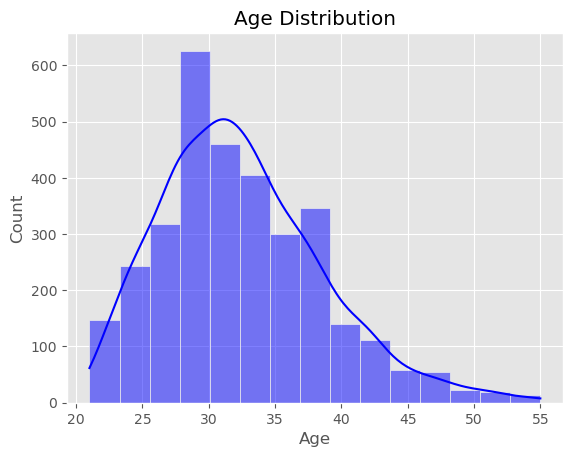

In [80]:
# visualizing the age distribution
sns.histplot(x=df["age"], kde=True, bins=15, color='blue')
plt.title(f"Age Distribution")
plt.xlabel("Age")
plt.show()

- From the visualization above, the age distribution looks slightly right-skewed (more people are in their late 20's and early 30's with fewer people at higher ages). Therefore, we will fill the missing rows using the `median` instead of the `mean` as the median is robust to skewness

In [81]:
# filling the customer's age with the median
df["age"] = df["age"].fillna(df["age"].median())

In [82]:
# re-checking for missing values
((df.isna().sum()/len(df))*100).sort_values(ascending=False)

latitude_gps                 25.160256
longitude_gps                25.160256
totaldue                      0.000000
termdays                      0.000000
loannumber                    0.000000
loanamount                    0.000000
interest                      0.000000
good_bad_flag                 0.000000
loan_term                     0.000000
interest_rate(%)              0.000000
bank_account_type             0.000000
bank_name_clients             0.000000
employment_status_clients     0.000000
num_prev_loans                0.000000
avg_loan_amt                  0.000000
avg_totaldue                  0.000000
avg_termdays                  0.000000
avg_prev_interest             0.000000
avg_interest_rate(%)          0.000000
avg_prev_delay_days           0.000000
avg_duration_days             0.000000
age                           0.000000
dtype: float64

In [83]:
# viewing the descriptive statistics
df.describe().T.round(2)

count      mean       std       min       25%  \
loannumber            4368.0      5.17      3.65      2.00      2.00   
loanamount            4368.0  17809.07  10749.69  10000.00  10000.00   
totaldue              4368.0  21257.38  11943.51  10000.00  13000.00   
termdays              4368.0     29.26     11.51     15.00     30.00   
interest              4368.0   3448.31   1692.69      0.00   3000.00   
interest_rate(%)      4368.0     21.77      7.71      0.00     15.00   
longitude_gps         3269.0      4.53      7.93   -118.25      3.35   
latitude_gps          3269.0      7.29      3.27    -33.87      6.47   
num_prev_loans        4368.0      4.16      3.66      0.00      1.00   
avg_loan_amt          4368.0  12882.91   4849.82      0.00  10000.00   
avg_totaldue          4368.0  15607.64   5420.90      0.00  12250.00   
avg_termdays          4368.0     25.26      6.97      0.00     20.00   
avg_prev_interest     4368.0   2724.73    852.78      0.00   2125.00   
avg_interest_rate(%)  4368.0     22.42      6.46      0.00     15.00   
avg_prev_delay_days   4368.0     -2.44      7.42    -32.00     -6.00   
avg_duration_days     4368.0     22.69      9.46      0.00     16.00   
age                   4368.0     32.36      5.33     21.00     29.00   

                           50%       75%       max  
loannumber                4.00      7.00     27.00  
loanamount            10000.00  20000.00  60000.00  
totaldue              13000.00  24500.00  68100.00  
termdays                 30.00     30.00     90.00  
interest               3000.00   4500.00   9000.00  
interest_rate(%)         22.50     30.00     30.00  
longitude_gps             3.58      6.44    151.21  
latitude_gps              6.63      7.43     71.23  
num_prev_loans            3.00      6.00     26.00  
avg_loan_amt          10000.00  14285.71  36666.67  
avg_totaldue          13000.00  17300.00  41252.38  
avg_termdays             28.00     30.00     60.00  
avg_prev_interest      3000.00   3000.00   9000.00  
avg_interest_rate(%)     22.50     30.00     30.00  
avg_prev_delay_days      -2.00      0.00    121.00  
avg_duration_days        23.00     28.00    151.00  
age                      32.00     34.00     55.00

In [84]:
# re-checking the overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loannumber                 4368 non-null   int64   
 1   loanamount                 4368 non-null   float64 
 2   totaldue                   4368 non-null   float64 
 3   termdays                   4368 non-null   int64   
 4   good_bad_flag              4368 non-null   object  
 5   interest                   4368 non-null   float64 
 6   interest_rate(%)           4368 non-null   float64 
 7   loan_term                  4368 non-null   category
 8   bank_account_type          4368 non-null   object  
 9   longitude_gps              3269 non-null   float64 
 10  latitude_gps               3269 non-null   float64 
 11  bank_name_clients          4368 non-null   object  
 12  employment_status_clients  4368 non-null   object  
 13  num_prev_loans             4368 n

> **2. Data Visualization**

**INSIGHT 1**
- ##### **Customers Locations**
Visualizing the different locations of the customers

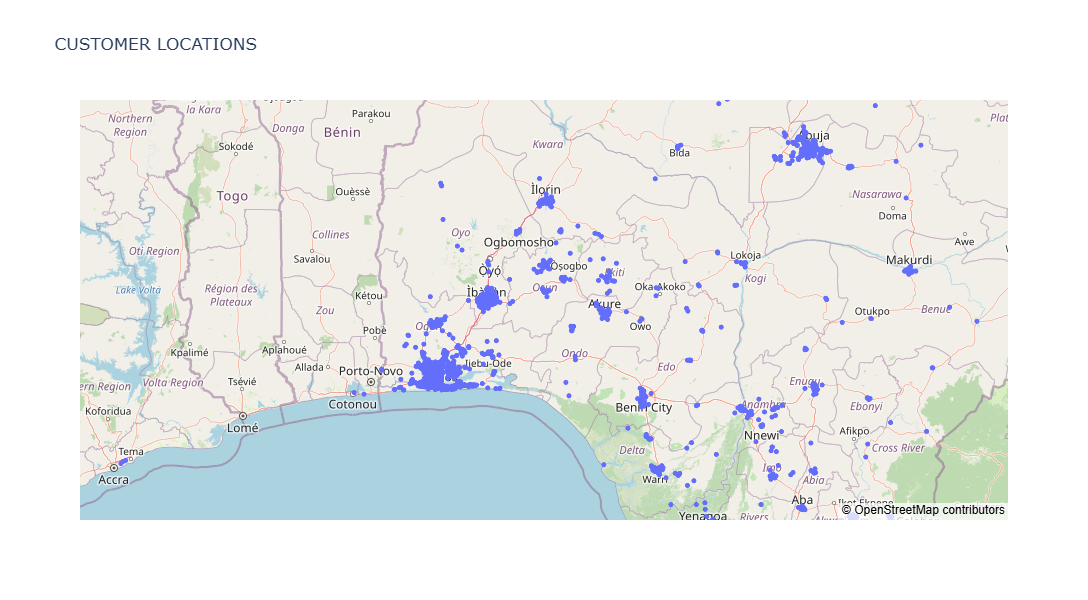

In [85]:
# plotting the gps coordinates on a map
coords = df.dropna(subset=["latitude_gps", "longitude_gps"]) #dropping rows with missing coordinates for this plot

fig = px.scatter_mapbox(
    coords,
    lat="latitude_gps",
    lon="longitude_gps",
    title="CUSTOMER LOCATIONS",
    width=1000,
    height=600,
    zoom=6
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

##### **OBSERVATION**
- From the map above, it was observed that customers are from different countries such as Nigeria, Ghana, Cotonou, e.t.c, with majority of the customers residing in Lagos, Nigeria. Thids implies that loans were taken more in Lagos, Nigeria than any other location.

**INSIGHT 2**
- ##### **Bank Locations**
Visualizing the different locations of the banks

In [86]:
df["bank_name_clients"].unique()

array(['Diamond Bank', 'GT Bank', 'Eco Bank', 'First Bank', 'Unknown',
       'Access Bank', 'UBA', 'Union Bank', 'FCMB', 'Zenith Bank',
       'Stanbic IBTC', 'Fidelity Bank', 'Wema Bank', 'Sterling Bank',
       'Skye Bank', 'Keystone Bank', 'Heritage Bank', 'Unity Bank',
       'Standard Chartered'], dtype=object)

In [87]:
# filter for known bank names
coords = coords[coords["bank_name_clients"].isin([
   'Diamond Bank', 'GT Bank', 'Eco Bank', 'First Bank', 'Unknown',
    'Access Bank', 'UBA', 'Union Bank', 'FCMB', 'Zenith Bank',
    'Stanbic IBTC', 'Fidelity Bank', 'Wema Bank', 'Sterling Bank',
    'Skye Bank', 'Keystone Bank', 'Heritage Bank', 'Unity Bank',
    'Standard Chartered'
])]

# plotting bank locations with colors for each bank
fig = px.scatter_mapbox(
    coords,
    lat="latitude_gps",
    lon="longitude_gps",
    title="BANK LOCATIONS",
    width=1000,
    height=600,
    zoom=6,
    hover_name="bank_name_clients",   # show bank name on hover
    color="bank_name_clients"         # color-code by bank
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

##### **OBSERVATION**
- Again, the map shows that more banks that gave out loan are in Lagos, Nigeria.

**INSIGHT 3**
- ##### **Distribution of Good_Bad_Flag**
Visualizing the proportion of the good_bad_flag

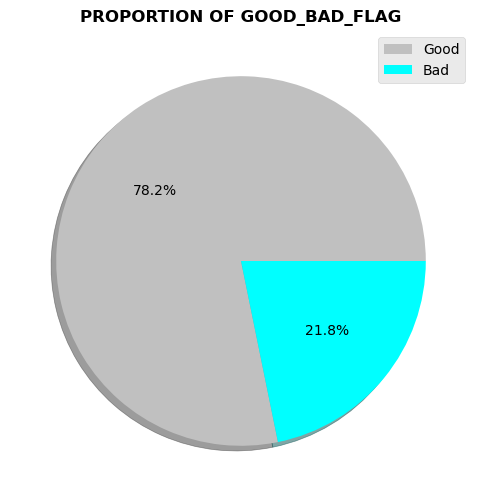

In [88]:
# GOOD_BAD_FLAG DISTRIBUTION
status_dist = df["good_bad_flag"].value_counts()  # counting the ocurrences of each GOOD and BAD category
x = status_dist.index
y = status_dist.values

# PLOTTING A PIE CHART SHOWING THE PROPORTION OF GOOD_BAD_FLAG

plt.figure(figsize=(6,6))
plt.pie(y, colors=["silver", "cyan"], autopct="%1.1f%%", shadow=True)
plt.title("PROPORTION OF GOOD_BAD_FLAG", fontsize=12, fontweight="bold", color="black")
plt.legend(labels=x)
plt.show()

##### **OBSERVATION**
- The pie chart above shows a significant proportion of the `Good Flag` to the `Bad Flag`, indicating that about`(78.2%)` of the customers that took loan actually repaid their loans while `(21.8%)` didn't

**INSIGHT 4**
- ##### **Loan Term by Loan Amount**
Identifying loan term associated with high loan

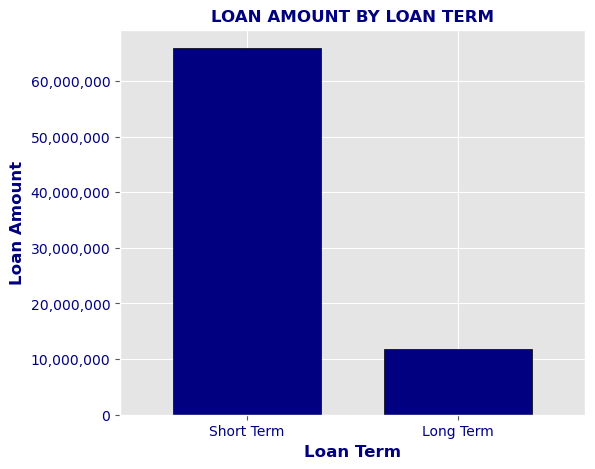

In [89]:
loan = df.groupby("loan_term")["loanamount"].sum()

# PLOTTING A BAR CHART SHOWING THE LOAN TERM WITH LOAN AMOUNT
ax = loan.plot(kind="bar", width=0.7, ec="black", color="navy", figsize=(6,5))
plt.title("LOAN AMOUNT BY LOAN TERM", fontsize=12, fontweight="bold", color="navy")
plt.xlabel("Loan Term", color="navy", fontweight="bold")
plt.ylabel("Loan Amount", color="navy", fontweight="bold")
plt.xticks(color="navy", rotation=0)
plt.yticks(color="navy")

# Formatting the y-axis to show full loan amount
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

##### **OBSERVATION**
- The chart shows that more short term loans `(15 & 30 days)` were applied with a significant total loan of over `60,000,000` compared to long term loans `(60 & 90 days)` with a total loan of about `10,000,000`

**INSIGHT 5**
- ##### **Banks by Total Loans**
Identifying Banks associated with more loans

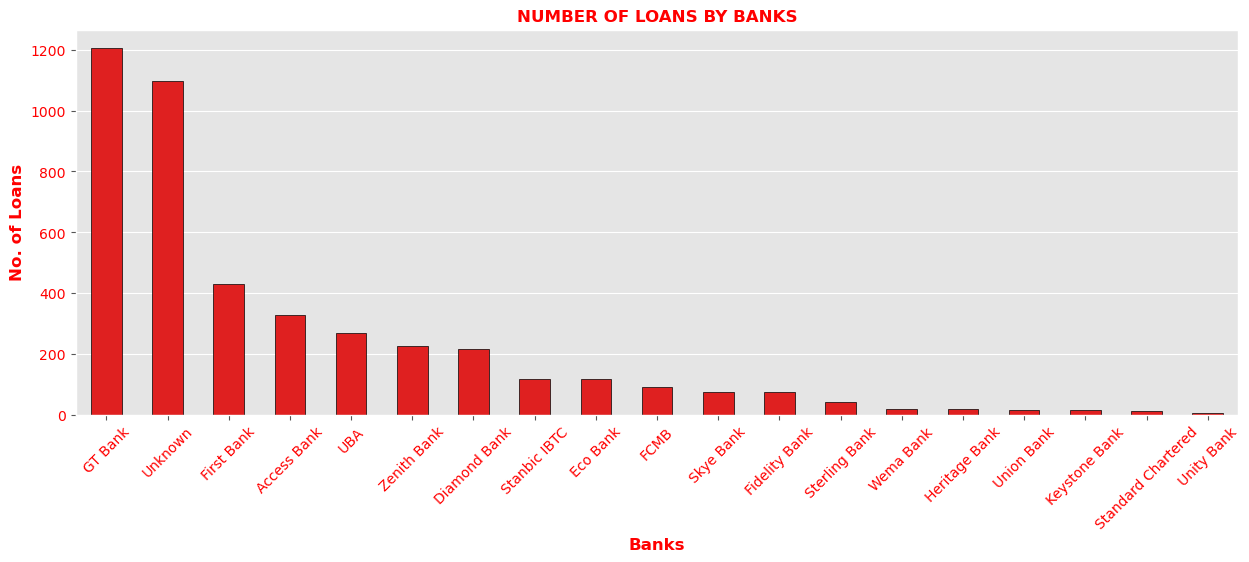

In [90]:
bank = df["bank_name_clients"].value_counts()  # counting the ocurrences of each bank
x = bank.index
y = bank.values

# PLOTTING A BAR CHART SHOWING THE BANKS BY THE NUMBER OF LOANS
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y, width=0.5, ec="black", color="red")
plt.title("NUMBER OF LOANS BY BANKS", fontsize=12, fontweight="bold", color="red")
plt.xlabel("Banks", color="red", fontweight="bold")
plt.ylabel("No. of Loans", color="red", fontweight="bold")
plt.xticks(color="red", rotation=45)
plt.yticks(color="red")

plt.show()

##### **OBSERVATION**
- The visual above shows that `GTBank` tops the chart with a total number of loans applied at about `1,200` compared to others, while `Wema Bank`, `Heritage Bank`, `Union Bank`, `Keystone Bank`, and `Standard Chartered` have a sligth edge over `Unity Bank` which has the least total number of loans applied. This may be due to factors such as `low interest rate` of `GTBank` or the availability of many branches across customer locations.

**INSIGHT 6**
- ##### **Banks by Loan Amount**
Identifying Banks associated with high loan

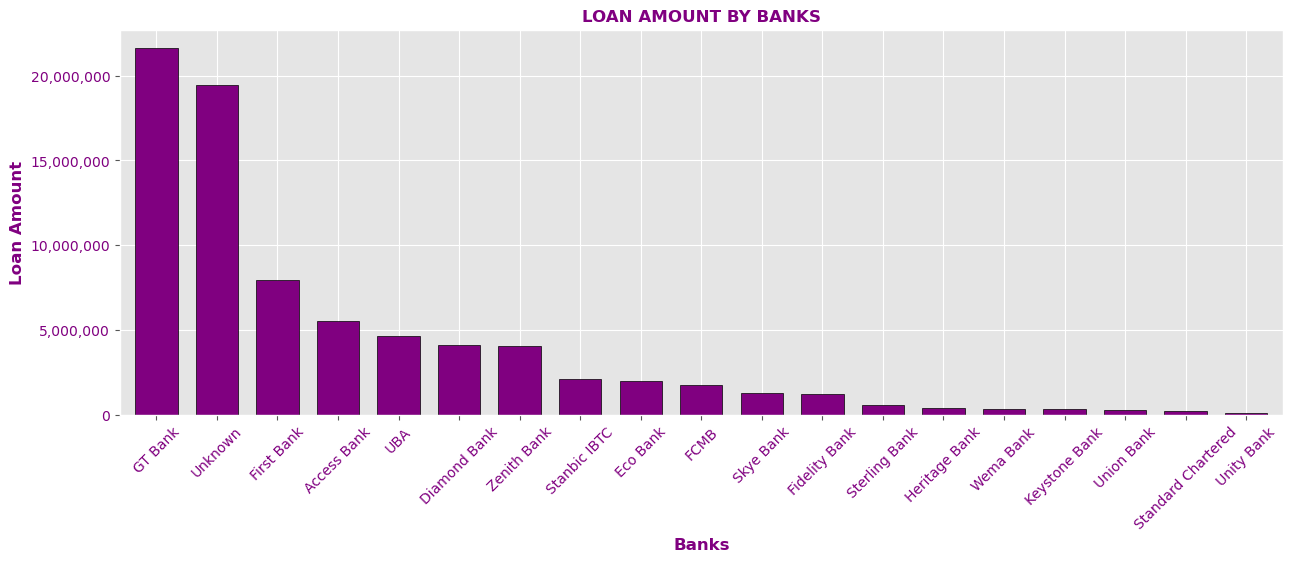

In [91]:
banks = df.groupby("bank_name_clients")["loanamount"].sum().sort_values(ascending=False)

# PLOTTING A BAR CHART SHOWING THE BANKS WITH LOAN AMOUNT
aax = banks.plot(kind="bar", width=0.7, ec="black", color="purple", figsize=(15,5))
plt.title("LOAN AMOUNT BY BANKS", fontsize=12, fontweight="bold", color="purple")
plt.xlabel("Banks", color="purple", fontweight="bold")
plt.ylabel("Loan Amount", color="purple", fontweight="bold")
plt.xticks(color="purple", rotation=45)
plt.yticks(color="purple")

# Formatting the y-axis to show full loan amount
aax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

##### **OBSERVATION**
- Again, `GTBank` tops the chart having approved a total amount over `20,000,000` out on loan, while `Unity Bank` remains the least

**INSIGHT 7**
- ##### **Employment Status by Total Loans**
Identifying employment status associated with more loans

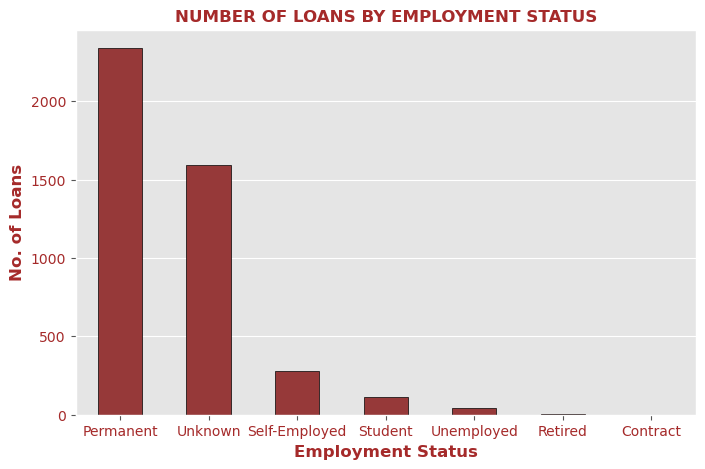

In [92]:
# EMPLOYMENT STATUS DISTRIBUTION
count = df["employment_status_clients"].value_counts()  # counting the ocurrences of each employment status
x = count.index
y = count.values

# PLOTTING A BAR CHART SHOWING THE EMPLOYMENT STATUS WITH NO. OF LOANS
plt.figure(figsize=(8,5))
sns.barplot(x=x, y=y, width=0.5, ec="black", color="brown")
plt.title("NUMBER OF LOANS BY EMPLOYMENT STATUS", fontsize=12, fontweight="bold", color="brown")
plt.xlabel("Employment Status", color="brown", fontweight="bold")
plt.ylabel("No. of Loans", color="brown", fontweight="bold")
plt.xticks(color="brown", rotation=0)
plt.yticks(color="brown")

plt.show()

##### **OBSERVATION**
- More customers on `Permanent` jobs or working `Full Time` took loans than customers with other employment status

**INSIGHT 8**
- ##### **Employment Status by Bad Flag**
Identifying Employment status associated with bad flags (defaulted)

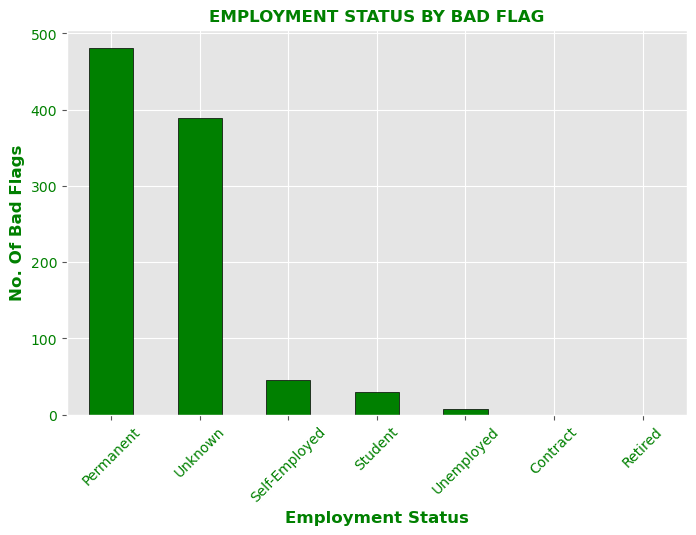

In [93]:
status_bad = df.groupby("employment_status_clients")["good_bad_flag"].value_counts().unstack()
status_bad = status_bad["Bad"].sort_values(ascending=False)

# PLOTTING A BAR CHART SHOWING THE EMPLOYMENT STATUS WITH BAD LOANS (DEFAULTED)
status_bad.plot(kind="bar", width=0.5, ec="black", color="green", figsize=(8,5))
plt.title("EMPLOYMENT STATUS BY BAD FLAG", fontsize=12, fontweight="bold", color="green")
plt.xlabel("Employment Status", color="green", fontweight="bold")
plt.ylabel("No. Of Bad Flags", color="green", fontweight="bold")
plt.xticks(color="green", rotation=45)
plt.yticks(color="green")

plt.show()

##### **OBSERVATION**
- Customers working on a `permanent` job tops the chart with almost `500` customers having a `bad` status flag. i.e they defaulted on their loans

**INSIGHT 9**
- ##### **Account Type by Good Flag**
Identifying account types associated with good flags (no default)

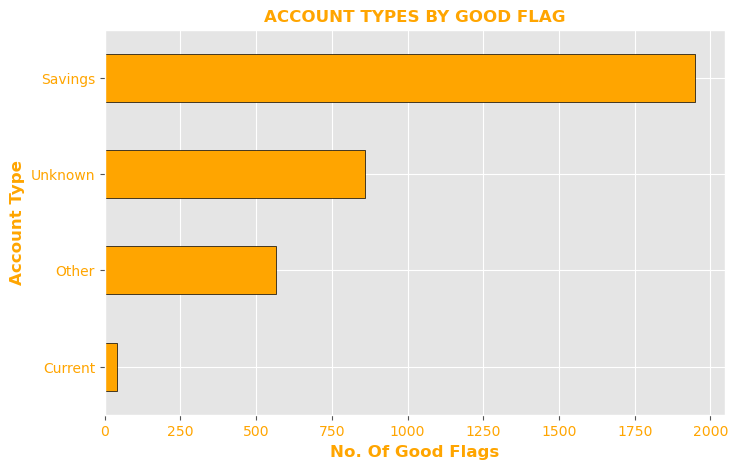

In [94]:
status_good = df.groupby("bank_account_type")["good_bad_flag"].value_counts().unstack()
status_good = status_good["Good"].sort_values()

# PLOTTING A BAR CHART SHOWING THE ACCOUNT TYPES WITH GOOD LOANS (NO DEFAULT)
status_good.plot(kind="barh", width=0.5, ec="black", color="orange", figsize=(8,5))
plt.title("ACCOUNT TYPES BY GOOD FLAG", fontsize=12, fontweight="bold", color="orange")
plt.xlabel("No. Of Good Flags", color="orange", fontweight="bold")
plt.ylabel("Account Type", color="orange", fontweight="bold")
plt.xticks(color="orange")
plt.yticks(color="orange")

plt.show()

##### **OBSERVATION**
- From the chart, customers running a `savings` bank account type have more `good` status flag compared to other bank account types with almost `2,000` customers who collected loan and repay their loans.

In [95]:
# dropping the latitude and longitude coordinates
df = df.drop(["latitude_gps", "longitude_gps"], axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loannumber                 4368 non-null   int64   
 1   loanamount                 4368 non-null   float64 
 2   totaldue                   4368 non-null   float64 
 3   termdays                   4368 non-null   int64   
 4   good_bad_flag              4368 non-null   object  
 5   interest                   4368 non-null   float64 
 6   interest_rate(%)           4368 non-null   float64 
 7   loan_term                  4368 non-null   category
 8   bank_account_type          4368 non-null   object  
 9   bank_name_clients          4368 non-null   object  
 10  employment_status_clients  4368 non-null   object  
 11  num_prev_loans             4368 non-null   float64 
 12  avg_loan_amt               4368 non-null   float64 
 13  avg_totaldue               4368 n

In [97]:
# Spliting our columns into numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

In [98]:
num_cols

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'interest',
 'interest_rate(%)',
 'num_prev_loans',
 'avg_loan_amt',
 'avg_totaldue',
 'avg_termdays',
 'avg_prev_interest',
 'avg_interest_rate(%)',
 'avg_prev_delay_days',
 'avg_duration_days',
 'age']

In [99]:
cat_cols

['good_bad_flag',
 'loan_term',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients']

**VISUALIZING THE NUMERICAL COLUMNS**

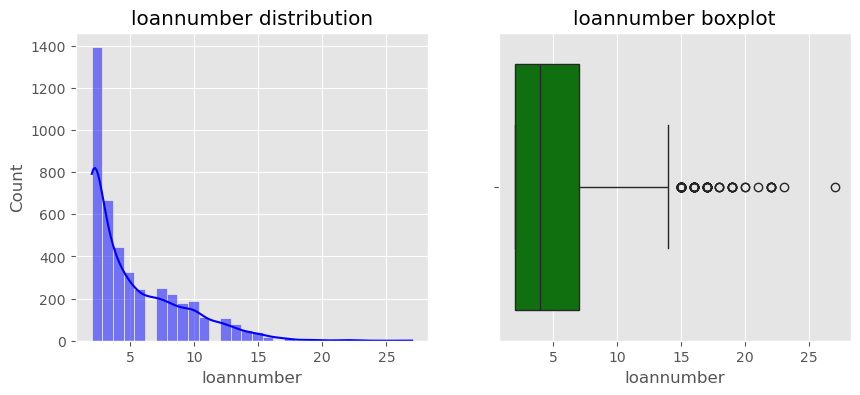

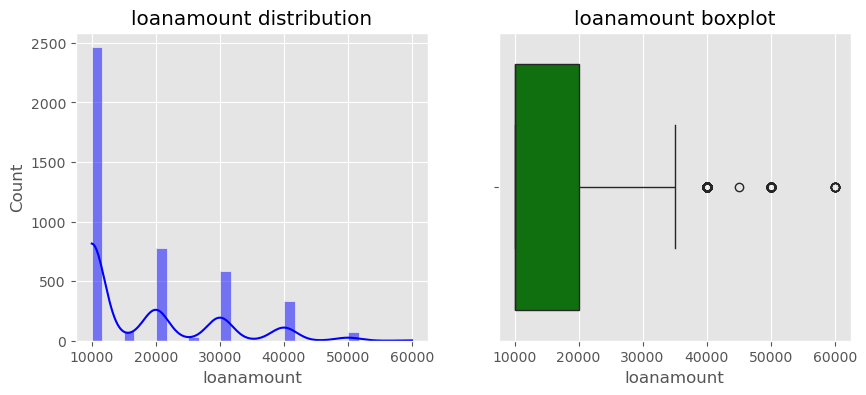

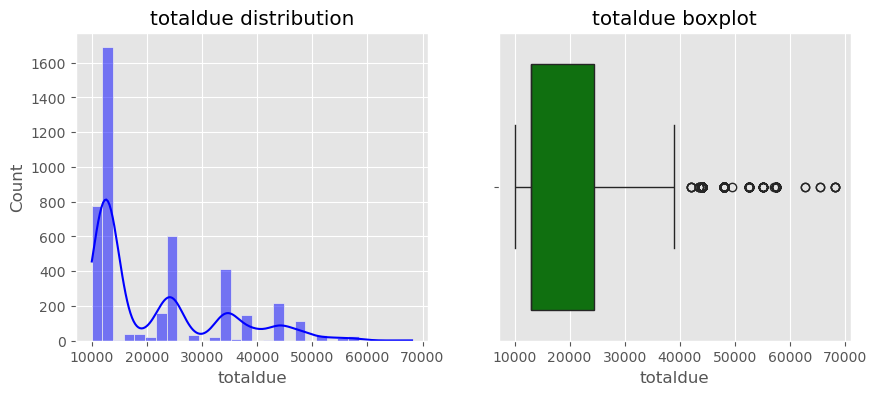

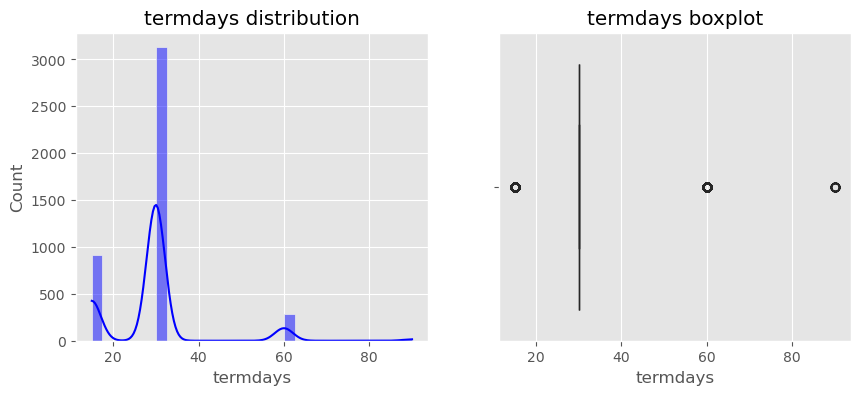

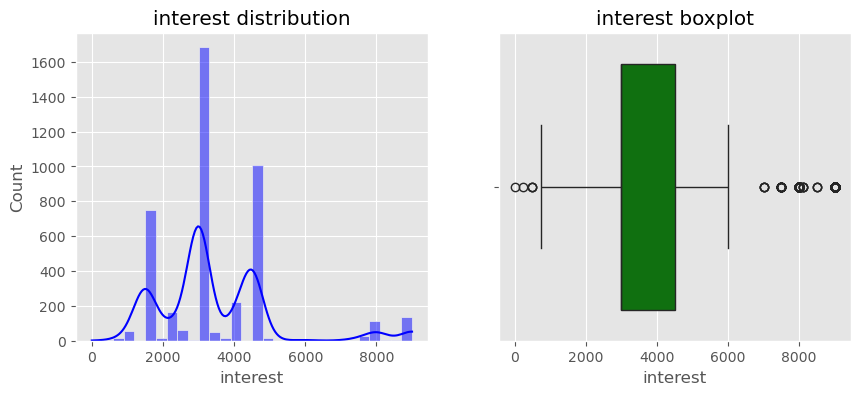

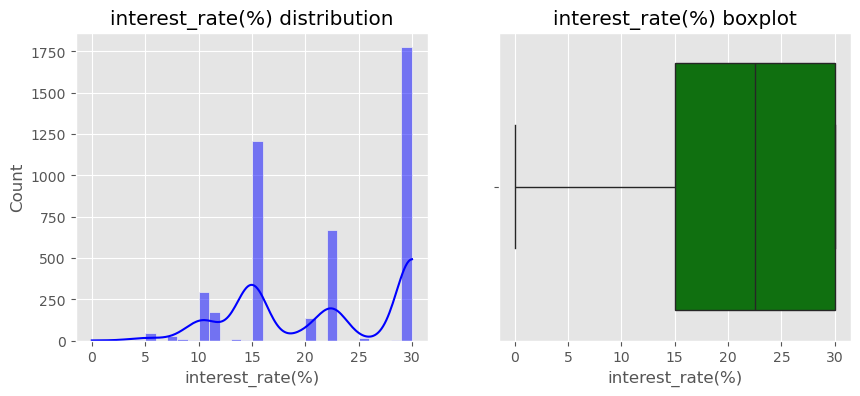

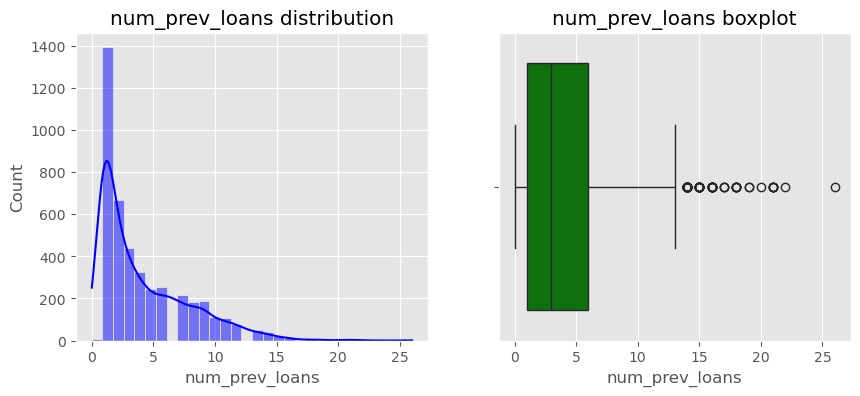

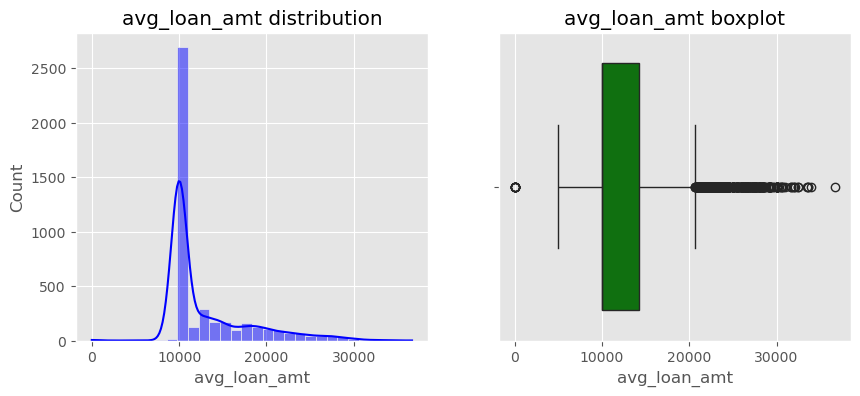

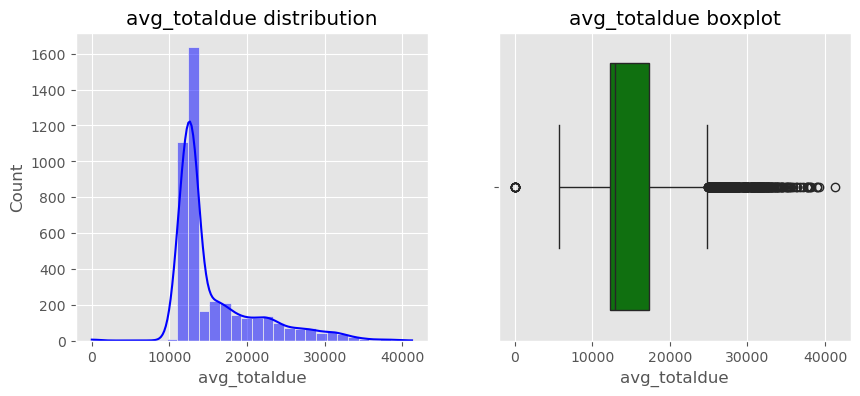

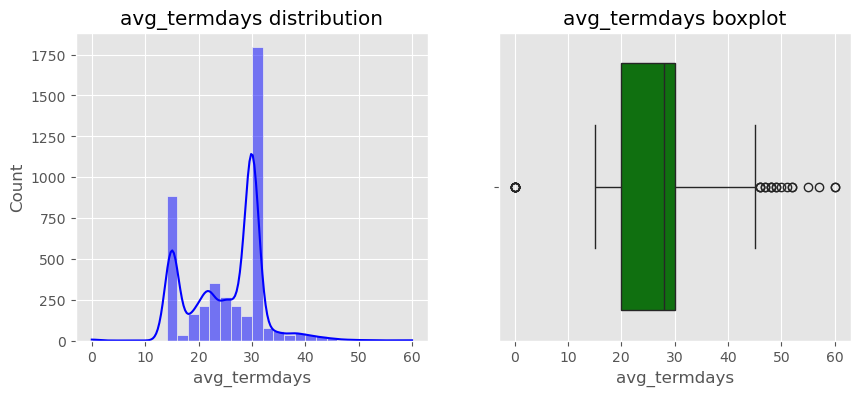

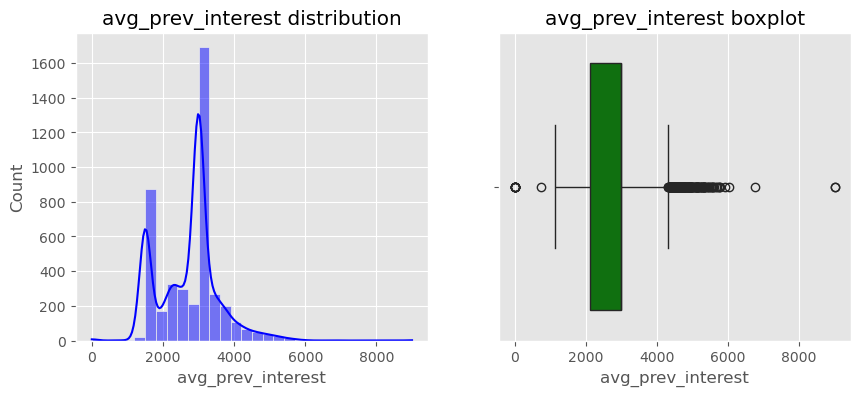

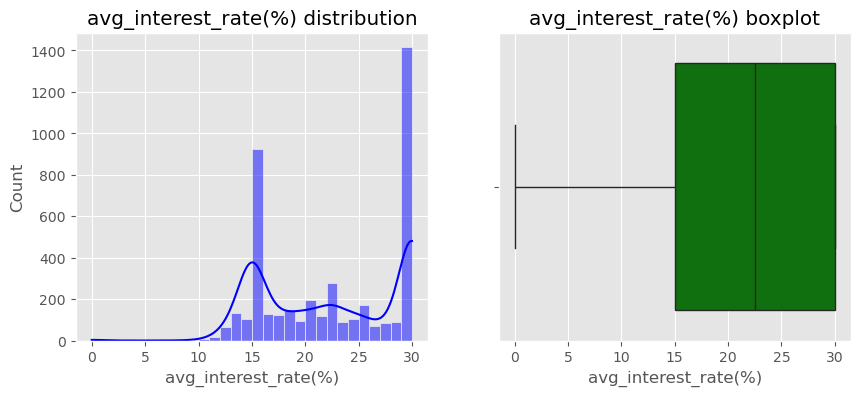

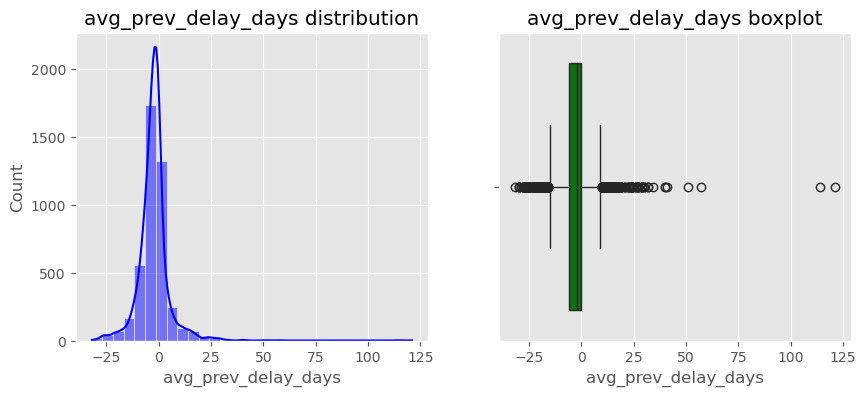

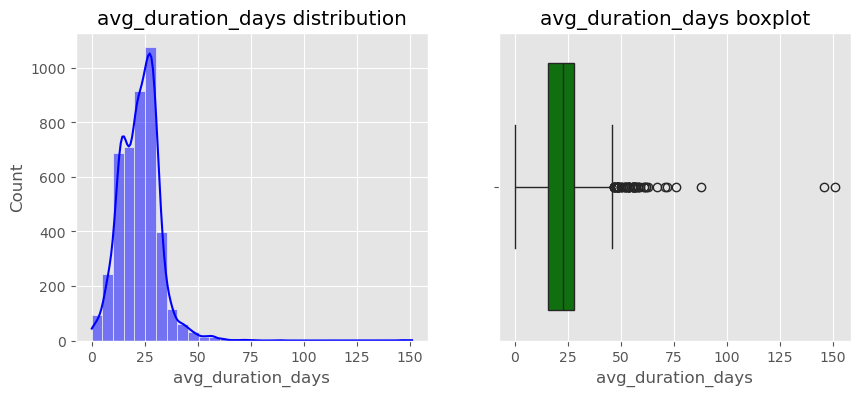

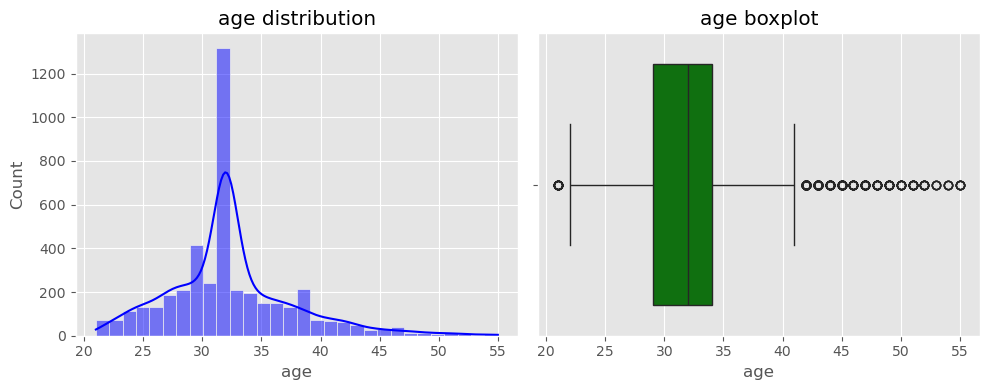

In [100]:
# visualize the numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col], color='green')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### **OBSERVATION**
- From the histplot(histogram) above, some features showed skewness in their distribution, while the boxplots displayed several features with outliers.

##### **SOLUTION**
- Since we are working with Tree-based models, such as; xgboost, lightGBM, e.t.c, which are less sensitive to skewness and outliers compared to linear models, we will move on to train our models without dealing with them (meanwhile, some outliers might not really be an outlier) except if not satisfied with the result, then we will treat them and train again.

**VISUALIZING THE CATEGORICAL COLUMNS**

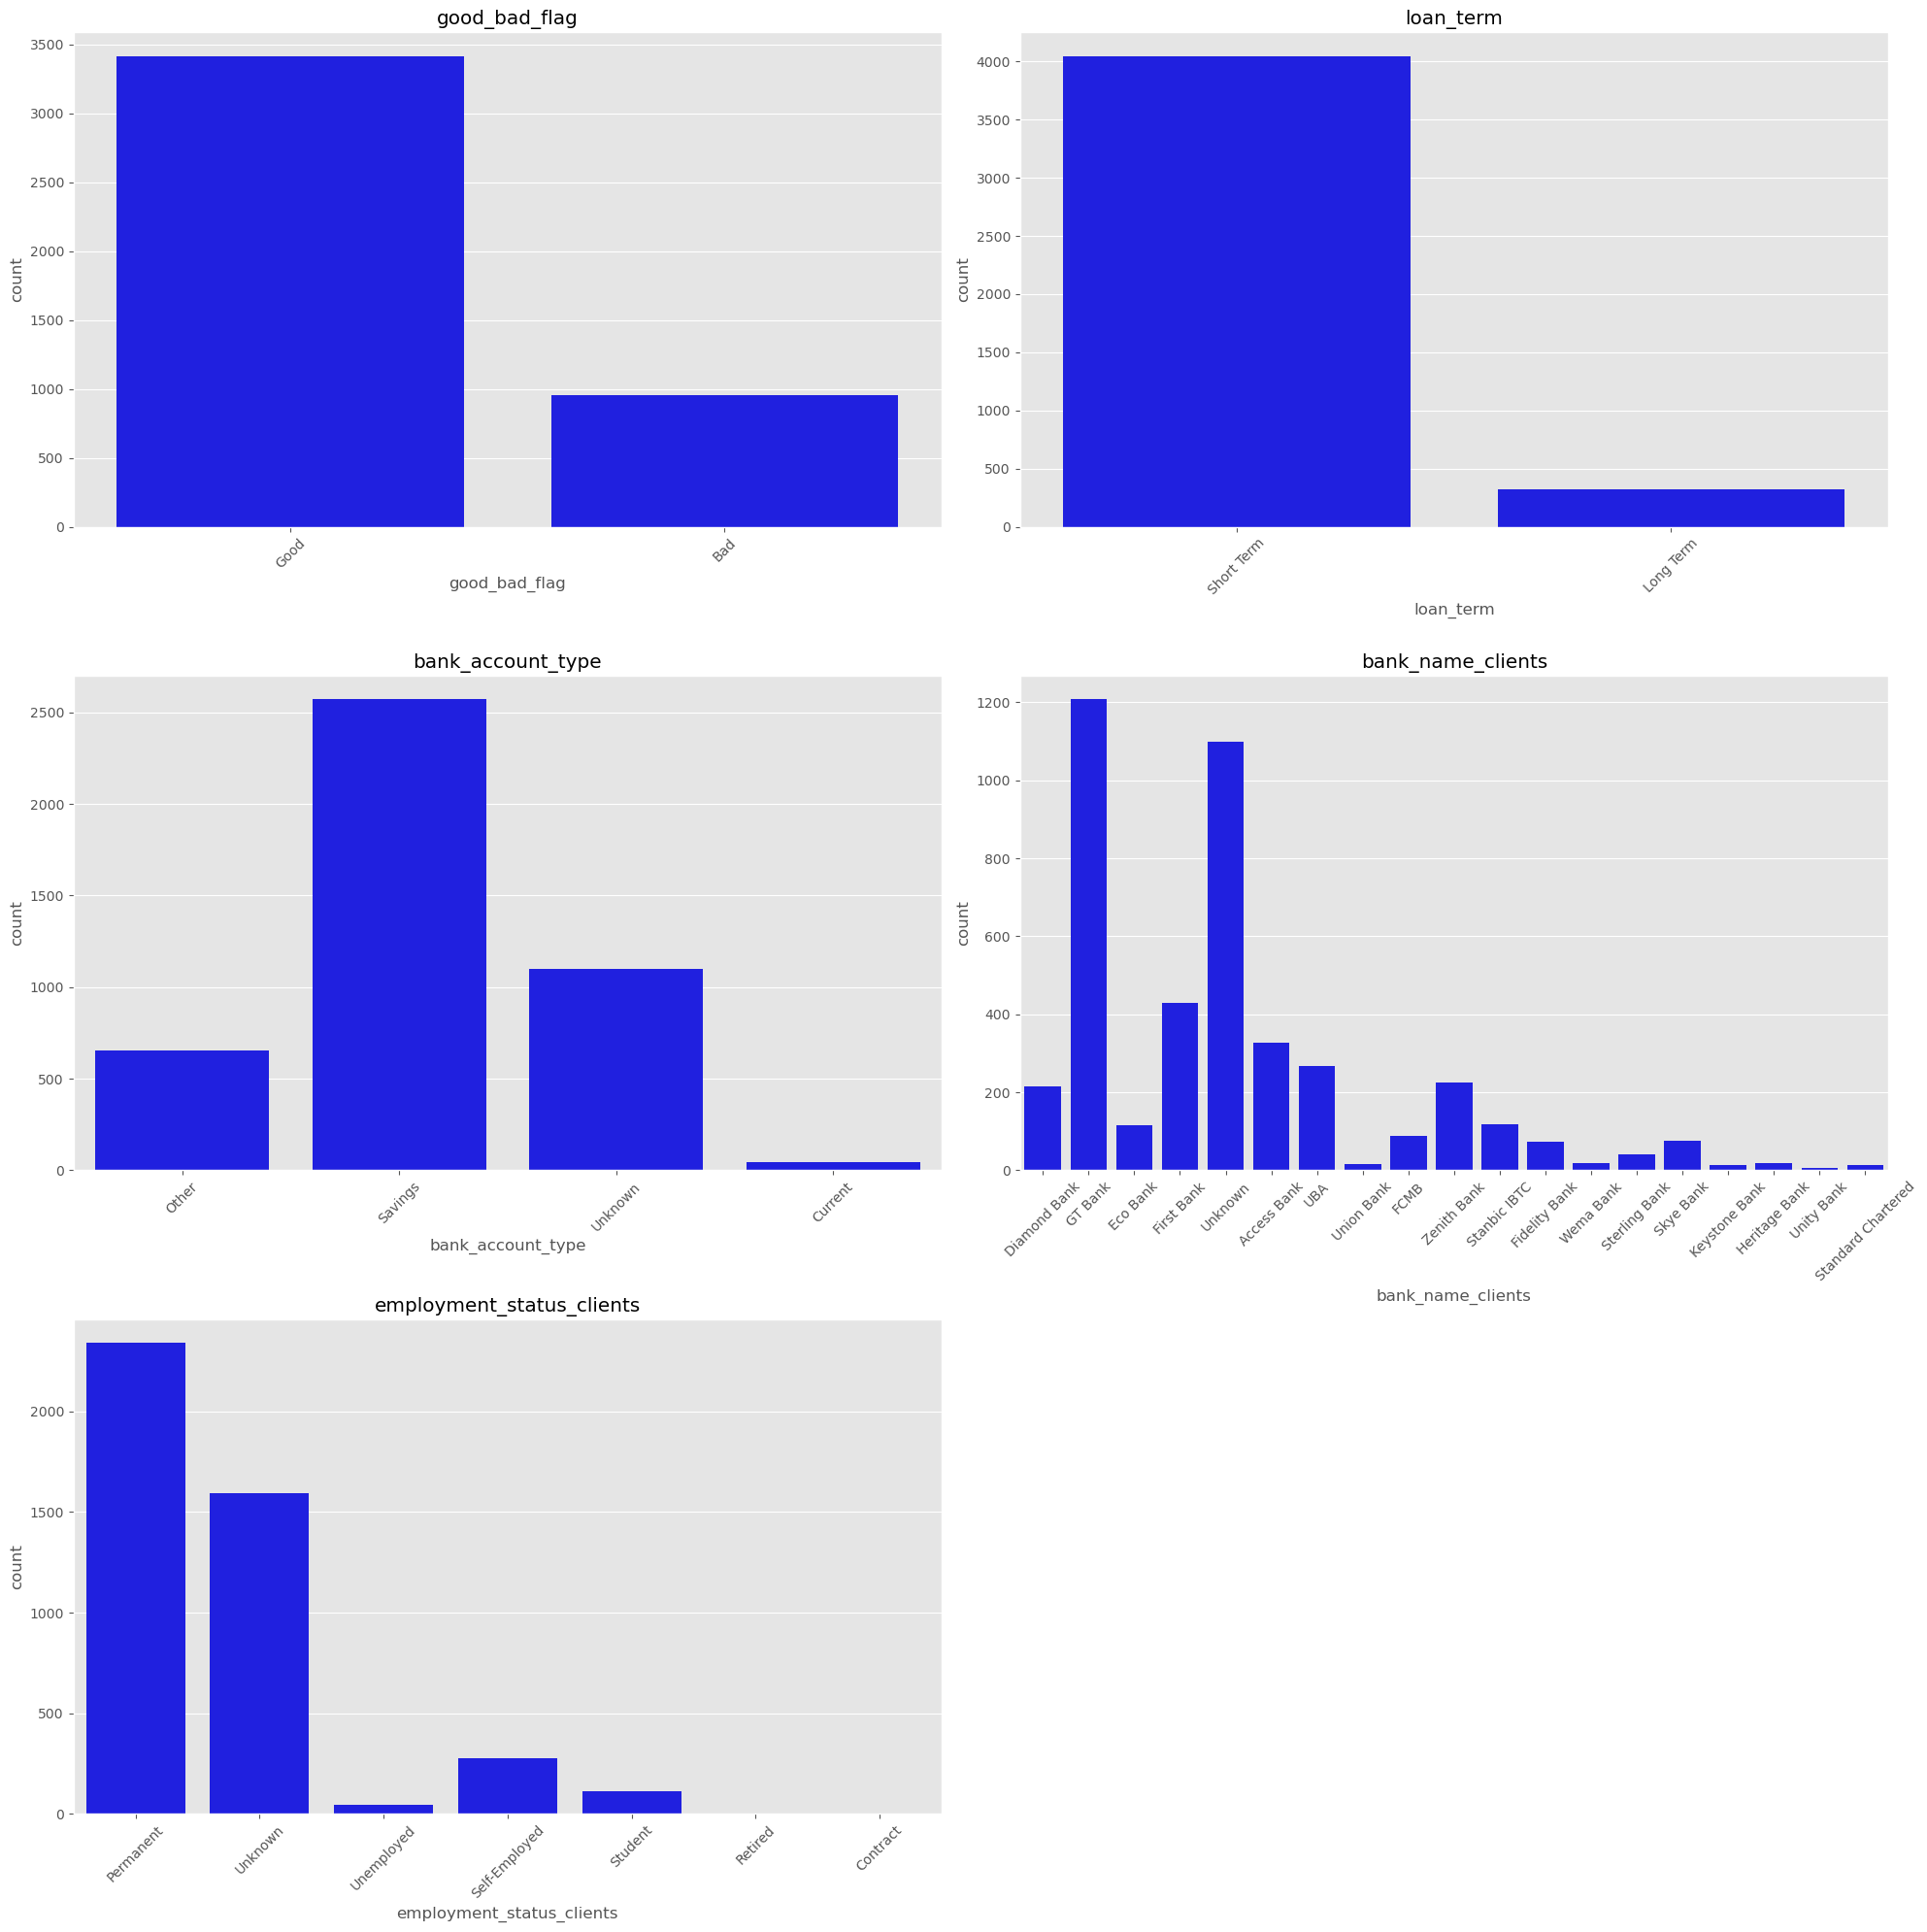

In [101]:
# Visualizing the categoptocal columns
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(ax=axes[i], x=df[col], color="blue")
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

    axes[5].set_visible(False)

plt.tight_layout()
plt.show()

##### **OBSERVATIONS**
- The target column `(good_bad_flag)` is significantly dominated with `good flags` compared to `bad flags` and this indicates a class imbalance in our data
- Most customers took `short term` loans
- Most customers run a `savings account` while the `current account` has fewer borrowers
- Most loans were taken from `GTBank` while fewer loans was taken from `unity bank`
- Customers on a `permanent` job dominates in taken loans


##### **SOLUTION**
- Consider handling class imbalance by applying `SMOTE` oversampling. This will be a further approach after training the models on imbalanced data to see how well it will perform.

- **Target Column**

In [102]:
# checking the unique value of the target column
df.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

In [103]:
# converting the target column to numerical since it is binary (1 = Good, 0 = Bad)
df.good_bad_flag = (df.good_bad_flag == 'Good').astype(int)

In [104]:
# confirming the change has been made
df.good_bad_flag.unique()

array([1, 0])

<Axes: xlabel='good_bad_flag'>

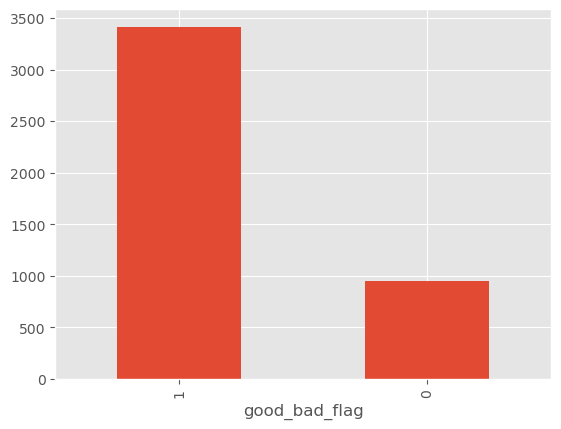

In [105]:
# visualizing the target column 
df.good_bad_flag.value_counts().plot(kind='bar')

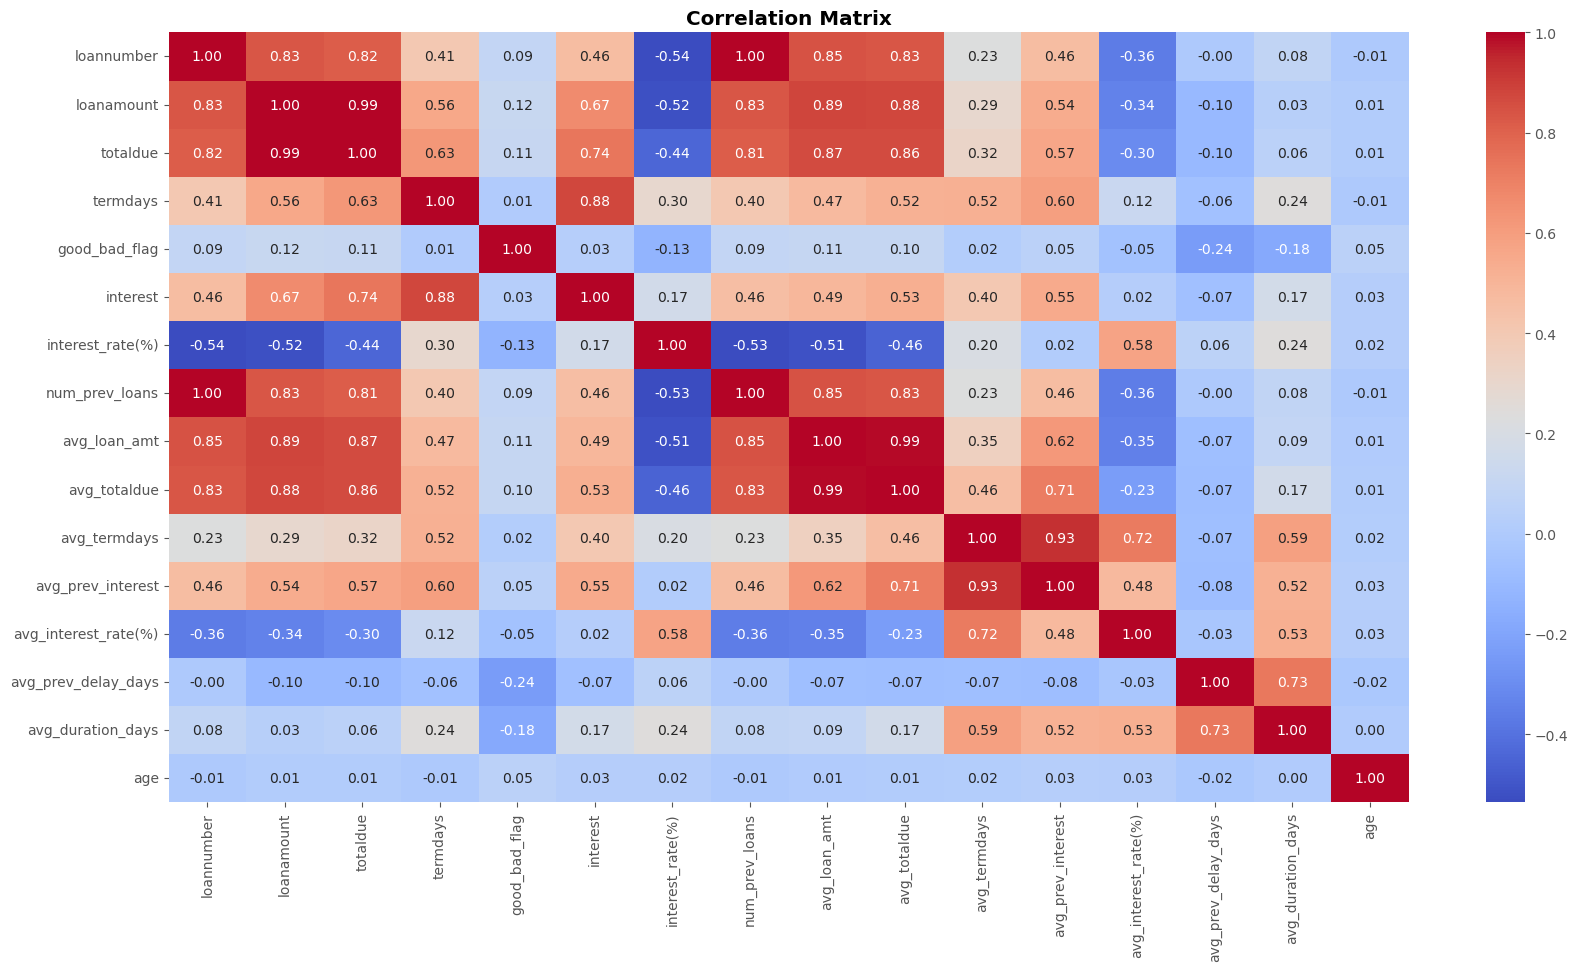

In [106]:
# Viewing the correlation matrix to see the relationships between the numerical features
# This helps to detect feature redundancy and potential multicollinearity.
num_col = df.select_dtypes(include=np.number).columns.tolist()
corr = df[num_col].corr()

# visualization
plt.figure(figsize=(20, 10))
sns.heatmap(data=corr, fmt=".2f", annot=True, cmap="coolwarm")
plt.title(f"Correlation Matrix", fontweight="bold")
plt.show()

##### **OBSERVATIONS**
- Several features are redundant and highly correlated. Some of which are;
>1. loanamount & totaldue
>2. loanamount & avg_loan_amt
>3. interest & interest_rate(%)
>4. num_prev_loans & loannumber
>5. avg_loan_amt & avg_totaldue
>6. avg_termdays & avg_prev_interest & avg_interest_rate(%)
>7. avg_prev_delay_days & avg_duration_days, e.t.c
- No single feature has a strong relationship with good_bad_flag
- Age has very weak or negative correlations with other features

##### **RECOMMENDATIONS**
- Apply Variance Inflation Factor (VIF) to measure multicollinearity. Below are VIF interpretations;
>1. VIF = 1 : No multicollinearity
>2. VIF < 5 : Acceptable, low correlation
>3. VIF 5 - 10 : Moderate multicollinearity, might be concerning.
>4. VIF > 10 : High multicollinearity
- Apply Principal Component Analysis (PCA) if there is high correlation. or
- Drop highly correlated features

##### **SOLUTIONS**
- I won't deal with multicollinearity now because i want to see how my models will perform with redundant features as tree-models are robust and less sensitive to multicollinearity, after which i will;
>1. Apply VIF to measure multicollinearity and compare results with correlation matrix so as to be certain of the highly correlated features
>2. Drop each of the highly correlated or redundant features

#### **DATA PREPROCESSING**

- #### **Features and Target**

In [107]:
# reviewing our column names
df.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'interest', 'interest_rate(%)', 'loan_term', 'bank_account_type',
       'bank_name_clients', 'employment_status_clients', 'num_prev_loans',
       'avg_loan_amt', 'avg_totaldue', 'avg_termdays', 'avg_prev_interest',
       'avg_interest_rate(%)', 'avg_prev_delay_days', 'avg_duration_days',
       'age'],
      dtype='object')

In [108]:
# separating into features and target
X = df.drop("good_bad_flag", axis=1)     #Features
y = df['good_bad_flag']                  #Target

In [109]:
# spliting our features into categorical anad numerical features
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

- #### **Preprocessing Pipeline**

In [110]:
# Creating numerical pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])


# Creating categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [111]:
# Combining both pipelines using a column transformer
processing = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols), 
    ('cat', cat_pipeline, cat_cols)  
])

In [112]:
processing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loannumber', 'loanamount', 'totaldue',
                                  'termdays', 'interest', 'interest_rate(%)',
                                  'num_prev_loans', 'avg_loan_amt',
                                  'avg_totaldue', 'avg_termdays',
                                  'avg_prev_interest', 'avg_interest_rate(%)',
                                  'avg_prev_delay_days', 'avg_duration_days',
                                  'age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['loan_term', 'bank_account_type',
                                  'bank_name_clients',
                                  'employment_status_clients'])])

#### **MODEL DEVELOPMENT**

In [113]:
# spliting the dataset into training and testing sets
# parsing the stratify parameter to ensure equal proportion of the different classes in the target variable when spliting, due to class imbalance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
# Creating a function, containing a pipeline, to evaluate multiple models and return the results in a DataFrame.
# This function also displays the confusion matrixes and ROC curves

def evaluate_models(models, preprocessors, X_train, X_test, y_train, y_test):

    results = []
    roc_curves = {}
    confusion_matrices = {}
    class_reports = {}

    for name, model in models.items():
        #pipeline
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessors),
            ("model", model)
        ])

        # Fit / train the model
        pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        # Computing Evaluation Metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        # Saving metric results
        results.append({
            "Model": name,
            "Accuracy": acc,
            "F1_Score": f1,
            "Precision": pre,
            "Recall": rec,
            "ROC-AUC": auc
        })

        # saving confusion matrix and classification report
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)
        class_reports[name] = classification_report(y_test, y_pred)

        # saving ROC results
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc)

        # converting metric results to a dataframe and display results
    df_results = pd.DataFrame(results).set_index("Model")
    print(f"\n EVALUATION METRICS RESULT \n")
    display(df_results)

        # displaying classification reports
    print(f"\n CLASSIFICATION REPORTS \n")
    for name, report in class_reports.items():
        print(f"{name}")
        print(f"{report}\n")

        # Plottting Confusion Matrices
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
        
    for i, (name, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{name} Confusion Matrix")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("Actual Label")
        
        axes[5].set_visible(False)  # hiding unused subplot
        
    plt.tight_layout()
    plt.show()      

        # Plotting ROC Curves
    plt.figure(figsize=(7,6))
    for name, (fpr, tpr, auc) in roc_curves.items():
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.title("ROC Curves", fontsize=12, fontweight="bold")
    plt.xlabel("False Positive Rate", fontweight="bold")
    plt.ylabel("True Positive Rate", fontweight="bold")
    plt.legend()
    plt.show()
    

In [115]:
# Defining the models for training 
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=12),
    "Logistic Regression": LogisticRegression(random_state=12, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=12),
    "XGBoost": XGBClassifier(random_state=12, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=12, verbose=-1)  
}

- #### **Model Evaluation**


 EVALUATION METRICS RESULT 



Accuracy  F1_Score  Precision    Recall   ROC-AUC
Model                                                                 
Decision Tree        0.695652  0.802963   0.813814  0.792398  0.567886
Logistic Regression  0.795195  0.883083   0.798111  0.988304  0.694783
Random Forest        0.774600  0.866077   0.809403  0.931287  0.638816
XGBoost              0.768879  0.863329   0.803526  0.932749  0.665539
LightGBM             0.776888  0.868154   0.807547  0.938596  0.671226


 CLASSIFICATION REPORTS 

Decision Tree
              precision    recall  f1-score   support

           0       0.32      0.35      0.33       190
           1       0.81      0.79      0.80       684

    accuracy                           0.70       874
   macro avg       0.57      0.57      0.57       874
weighted avg       0.71      0.70      0.70       874


Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.10      0.18       190
           1       0.80      0.99      0.88       684

    accuracy                           0.80       874
   macro avg       0.75      0.54      0.53       874
weighted avg       0.78      0.80      0.73       874


Random Forest
              precision    recall  f1-score   support

           0       0.46      0.21      0.29       190
           1       0.81      0.93      0.87       684

    accuracy                           0.77       874
   macro avg       0.63      0.57      0.58       8

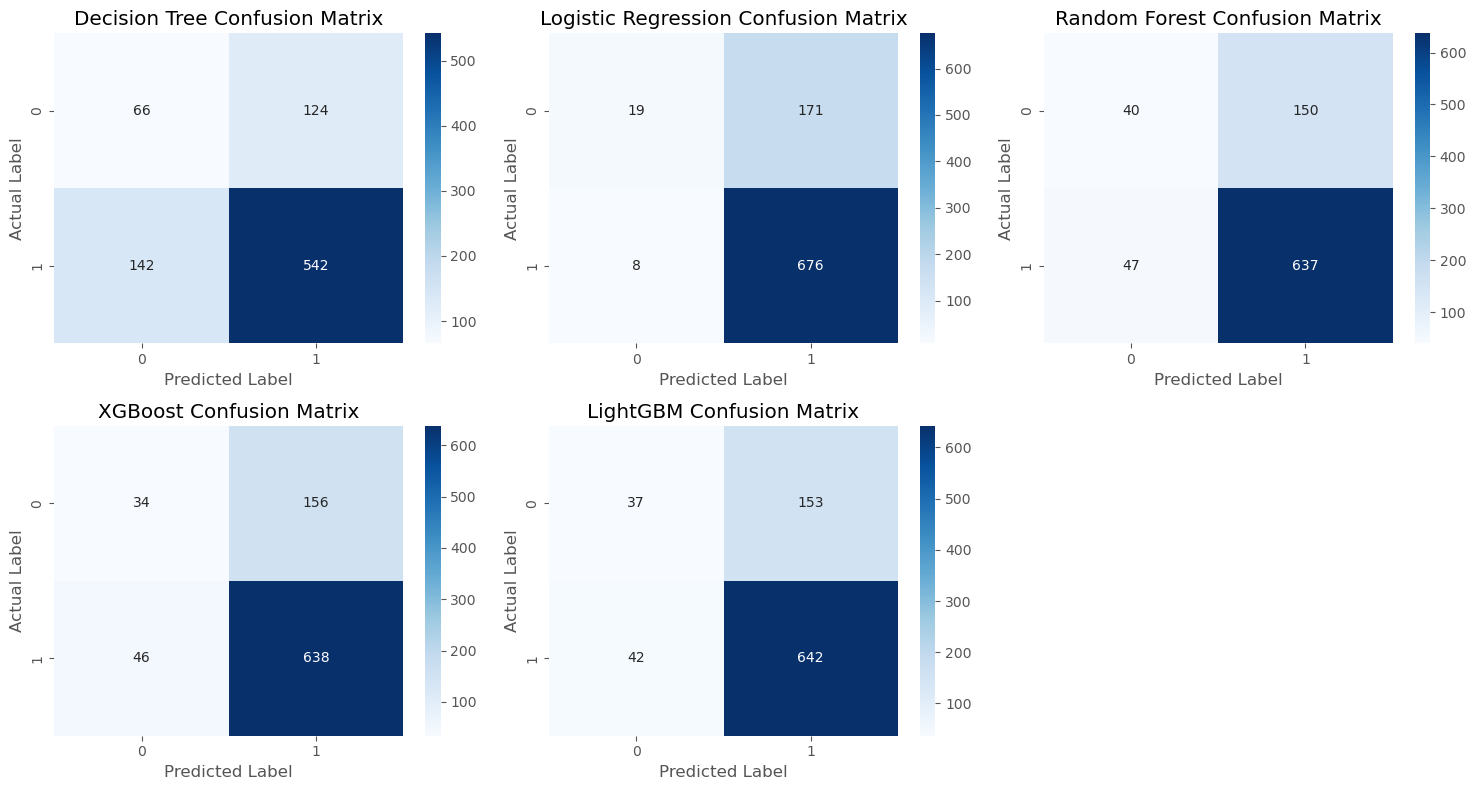

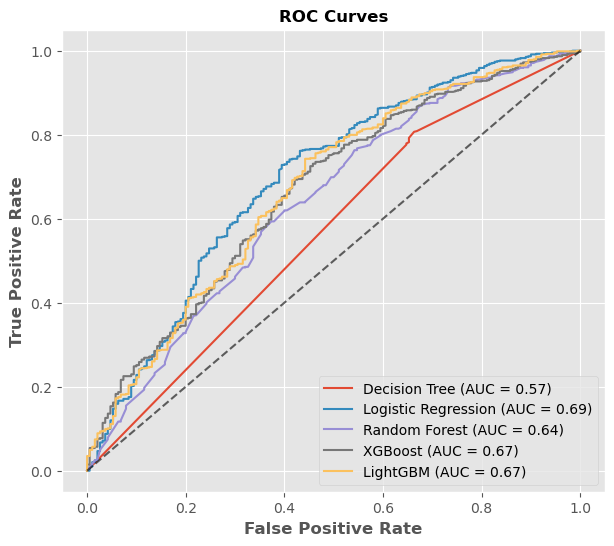

None

In [116]:
# using our function to iterate over and train & evaluate our models
results = evaluate_models(
    models = models,
    preprocessors = processing,
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test,
)

display(results)

#### **OBSERVATIONS**
**From the results table:**
- `Logistic Regression` is having the `highest recall (0.988)`, meaning it captures almost `all positives`, but at the `cost of more false positives (precision = 0.798)`.
- `Random Forest, XGBoost, and LightGBM` have strong balance of `recall (0.93, 0.93, 0.94) and precision (0.81, 0.80, 0.81)`. Good F1-scores (0.87, 0.86, 0.87).
- `Decision Tree` is the `lowest performer overall`, weaker generalization and lowest AUC.
> - If catching as many positives as possible is critical, then Logistic Regression is best due to its near-perfect recall (0.988).
> - If balance between false positives and false negatives is more important, then LightGBM, Random Forest, or XGBoost are better choices since they provide strong F1-scores and higher AUC than Decision Tree.

**From the correlation matrices:**
- `Decision Tree` have `many false negatives (142)`, meaning it struggles to correctly identify the positive class.
- `Logistic Regression` has much `fewer false negatives (8)`, meaning `very high recall`.
- `Random Forest, XGBoost, LightGBM` are `balanced`, but still `some false positives (150+)`, though their `true positives are high (637–642)`.

**From the ROC Curves and AUC scores:**
- **ROC curves show the trade-off between True Positive Rate and False Positive Rate.**
- `Decision Tree AUC = 0.57`, barely better than random guessing.
- `Logistic Regression AUC = 0.69`, best curve, good separation power.
- `Random Forest (0.64), XGBoost (0.67), LightGBM (0.67)`, all decent, stronger than Decision Tree but not as good as Logistic Regression.


#### **NEXT STEPS FOR IMPROVEMENT**
**Check for Class Imbalance**
- The confusion matrices suggest there might be more positives than negatives (lots of true positives but fewer true negatives).
> - Since the dataset is imbalanced, we will apply `SMOTE (synthetic oversampling of the minority class)`.
> - Class weights in models (e.g., class_weight='balanced' in Logistic Regression and Random Forest).

**Check for multicollinearity**
- Explore `Variance Inflation Factor (VIF)` to measure multicollinearity.
- Remove irrelevant/noisy, and highly correlated features that might confuse models.

#### **MULTICOLINEARITY AND CLASS IMBALANCE**
- Applying VIF to measure multicollinearity
- Dropping highly correlated features
- Applying SMOTE oversampling to handle class imbalance

- **VARIANCE INFLATION FACTOR (VIF)**

In [117]:
# Selecting the numerical features only, excluding target feature(good_bad_flag)
v = X[num_cols]

# Calculating VIF for each of the numerical feature
v_const = add_constant(v)     #adding a constant
vif = pd.DataFrame()
vif["feature_name"] = v_const.columns
vif["VIF"] = [variance_inflation_factor(v_const.values, i) for i in range(v_const.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False, ignore_index=True)
display(vif)

feature_name           VIF
0               totaldue           inf
1             loanamount           inf
2               interest           inf
3           avg_loan_amt  5.455602e+12
4      avg_prev_interest  1.686678e+11
5           avg_totaldue  2.155380e+04
6         num_prev_loans  8.680824e+02
7             loannumber  8.615272e+02
8                  const  2.728819e+02
9      avg_duration_days  4.207756e+01
10          avg_termdays  4.088650e+01
11  avg_interest_rate(%)  2.906480e+01
12   avg_prev_delay_days  2.650003e+01
13              termdays  9.486150e+00
14      interest_rate(%)  6.982049e+00
15                   age  1.012410e+00

- **Dropping Highly Correlated Features**
> loannumber, totaldue, interest, avg_totaldue, avg_prev_interest, avg_loan_amt, avg_duration_days, avg_interest_rate(%)

In [118]:
# dropping correlated / redundant features
cols = ["loannumber", "totaldue", "interest", "avg_totaldue", "avg_prev_interest", "avg_loan_amt", "avg_duration_days", "avg_interest_rate(%)"]

df = df.drop(cols, axis=1)

In [119]:
# separating the reduced data into features and target
X = df.drop("good_bad_flag", axis=1)     #Features
y = df['good_bad_flag']                  #Target

In [120]:
# spliting our features into categorical and numerical features
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

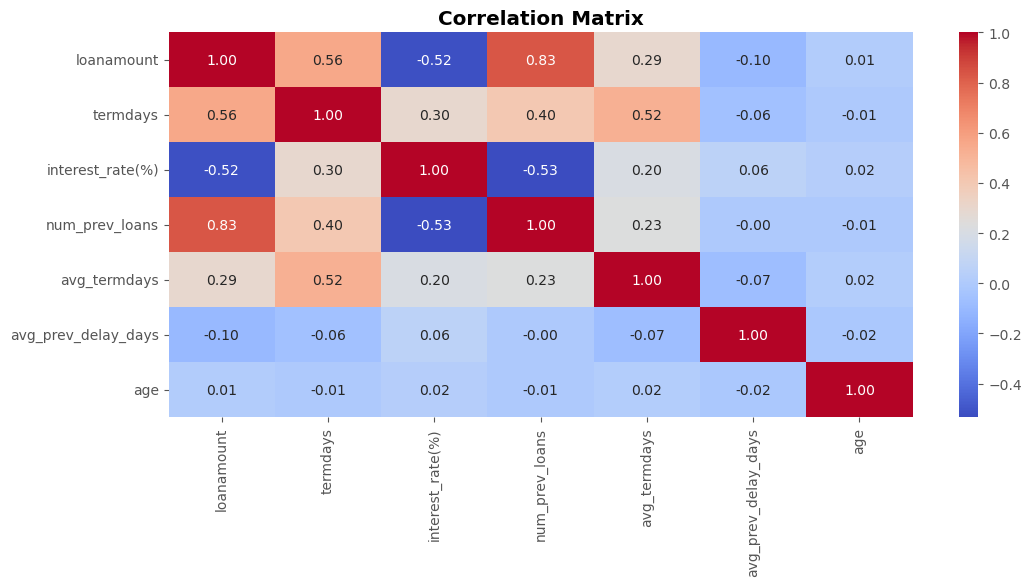

In [121]:
# re-check for multicolinearity using correlation matrix
corr = df[num_cols].corr()

# visualization
plt.figure(figsize=(12, 5))
sns.heatmap(data=corr, fmt=".2f", annot=True, cmap="coolwarm")
plt.title(f"Correlation Matrix", fontweight="bold")
plt.show()

In [122]:
# re-check for multicolinearity using VIF
v = X[num_cols]

# Calculating VIF for each of the numerical feature
v_const = add_constant(v)     #adding a constant
vif = pd.DataFrame()
vif["feature_name"] = v_const.columns
vif["VIF"] = [variance_inflation_factor(v_const.values, i) for i in range(v_const.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False, ignore_index=True)
display(vif)

feature_name        VIF
0                const  67.724754
1           loanamount   7.423625
2             termdays   4.848564
3     interest_rate(%)   4.665779
4       num_prev_loans   3.539813
5         avg_termdays   1.407710
6  avg_prev_delay_days   1.038252
7                  age   1.008496

##### **OBSERVATIONS**
- After dropping correlated features and re-check for multicollinearity using the correlation matrix and VIF, it was observed that some features from the `correlation matrix` are still showing `high or moderate correlation`, but from the `VIF results` all features are having a `VIF score below 5` which is `acceptable`, except for `loanamount` whose `VIF score is 7` which is `moderate but concerning`.

##### **SOLUTION**
- Since `loanamount` is an important feature for `predicting loan default`, and we are training a `tree based model` which is robust and less sensitive to multicollinearity, we won't be dropping the feature. So we move ahead to handle class imbalance

- **HANDLING CLASS IMBALANCE USING SMOTE**

In [123]:
# Creating numerical pipeline for the reduced data
num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Creating categorical pipeline for the reduced data
cat_pipe = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [124]:
# Combining both pipelines using a column transformer
preprocessors = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols), 
    ('cat', cat_pipe, cat_cols)  
])

In [125]:
preprocessors

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loanamount', 'termdays', 'interest_rate(%)',
                                  'num_prev_loans', 'avg_termdays',
                                  'avg_prev_delay_days', 'age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['loan_term', 'bank_account_type',
                                  'bank_name_clients',
                                  'employment_status_clients'])])

In [126]:
# spliting the dataset into training and testing sets
# parsing the stratify parameter to ensure equal proportion of the different classes in the target variable when spliting, due to class imbalance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- **Optimizing our Function to Include SMOTE**

In [127]:
# Creating a function, containing a pipeline to handle class imbalance(SMOTE), evaluate multiple models and return the results in a DataFrame.
# This function also displays the confusion matrixes and ROC curves

def evaluate_models_res(models, preprocessors, X_train, X_test, y_train, y_test):

    results = []
    roc_curves = {}
    confusion_matrices = {}
    class_reports = {}

    for name, model in models.items():
        # pipeline
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessors),
            ("smote", SMOTE(random_state=42)),
            ("model", model)
        ])

        # Fit / train the model
        pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        # Computing Evaluation Metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        # Saving metric results
        results.append({
            "Model": name,
            "Accuracy": acc,
            "F1_Score": f1,
            "Precision": pre,
            "Recall": rec,
            "ROC-AUC": auc
        })

        # saving confusion matrix and classification report
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)
        class_reports[name] = classification_report(y_test, y_pred)

        # saving ROC results
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc)

        # converting metric results to a dataframe and display results
    df_results = pd.DataFrame(results).set_index("Model")
    print(f"\n RESAMPLED DATA EVALUATION METRICS RESULT \n")
    display(df_results)

        # displaying classification reports
    print(f"\n CLASSIFICATION REPORTS AFTER RESAMPLING \n")
    for name, report in class_reports.items():
        print(f"{name}")
        print(f"{report}\n")

        # Plottting Confusion Matrices
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
        
    for i, (name, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{name} Confusion Matrix")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("Actual Label")
        
        axes[5].set_visible(False)  # hiding unused subplot
        
    plt.tight_layout()
    plt.show()      

        # Plotting ROC Curves
    plt.figure(figsize=(7,6))
    for name, (fpr, tpr, auc) in roc_curves.items():
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.title("RESAMPLED ROC Curves", fontsize=12, fontweight="bold")
    plt.xlabel("False Positive Rate", fontweight="bold")
    plt.ylabel("True Positive Rate", fontweight="bold")
    plt.legend()
    plt.show()
    

- **Training our models on resampled data**

In [128]:
# Defining the models for training 
res_models = {
    "Res_Decision Tree": DecisionTreeClassifier(random_state=12),
    "Res_Logistic Regression": LogisticRegression(class_weight="balanced", random_state=12, max_iter=1000),
    "Res_Random Forest": RandomForestClassifier(class_weight="balanced",random_state=12),
    "Res_XGBoost": XGBClassifier(objective="binary:logistic", random_state=12, use_label_encoder=False, eval_metric="logloss"),
    "Res_LightGBM": LGBMClassifier(objective="binary", random_state=12, verbose=-1)  
}


 RESAMPLED DATA EVALUATION METRICS RESULT 



Accuracy  F1_Score  Precision    Recall   ROC-AUC
Model                                                                     
Res_Decision Tree        0.667048  0.782022   0.801843  0.763158  0.538027
Res_Logistic Regression  0.659039  0.755738   0.860075  0.673977  0.692613
Res_Random Forest        0.766590  0.855728   0.828767  0.884503  0.643352
Res_XGBoost              0.774600  0.862141   0.826846  0.900585  0.662377
Res_LightGBM             0.780320  0.867036   0.823684  0.915205  0.675954


 CLASSIFICATION REPORTS AFTER RESAMPLING 

Res_Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.32      0.30       190
           1       0.80      0.76      0.78       684

    accuracy                           0.67       874
   macro avg       0.54      0.54      0.54       874
weighted avg       0.69      0.67      0.68       874


Res_Logistic Regression
              precision    recall  f1-score   support

           0       0.34      0.61      0.44       190
           1       0.86      0.67      0.76       684

    accuracy                           0.66       874
   macro avg       0.60      0.64      0.60       874
weighted avg       0.75      0.66      0.69       874


Res_Random Forest
              precision    recall  f1-score   support

           0       0.45      0.34      0.39       190
           1       0.83      0.88      0.86       684

    accuracy                           0.77       874
   macro avg       0.6

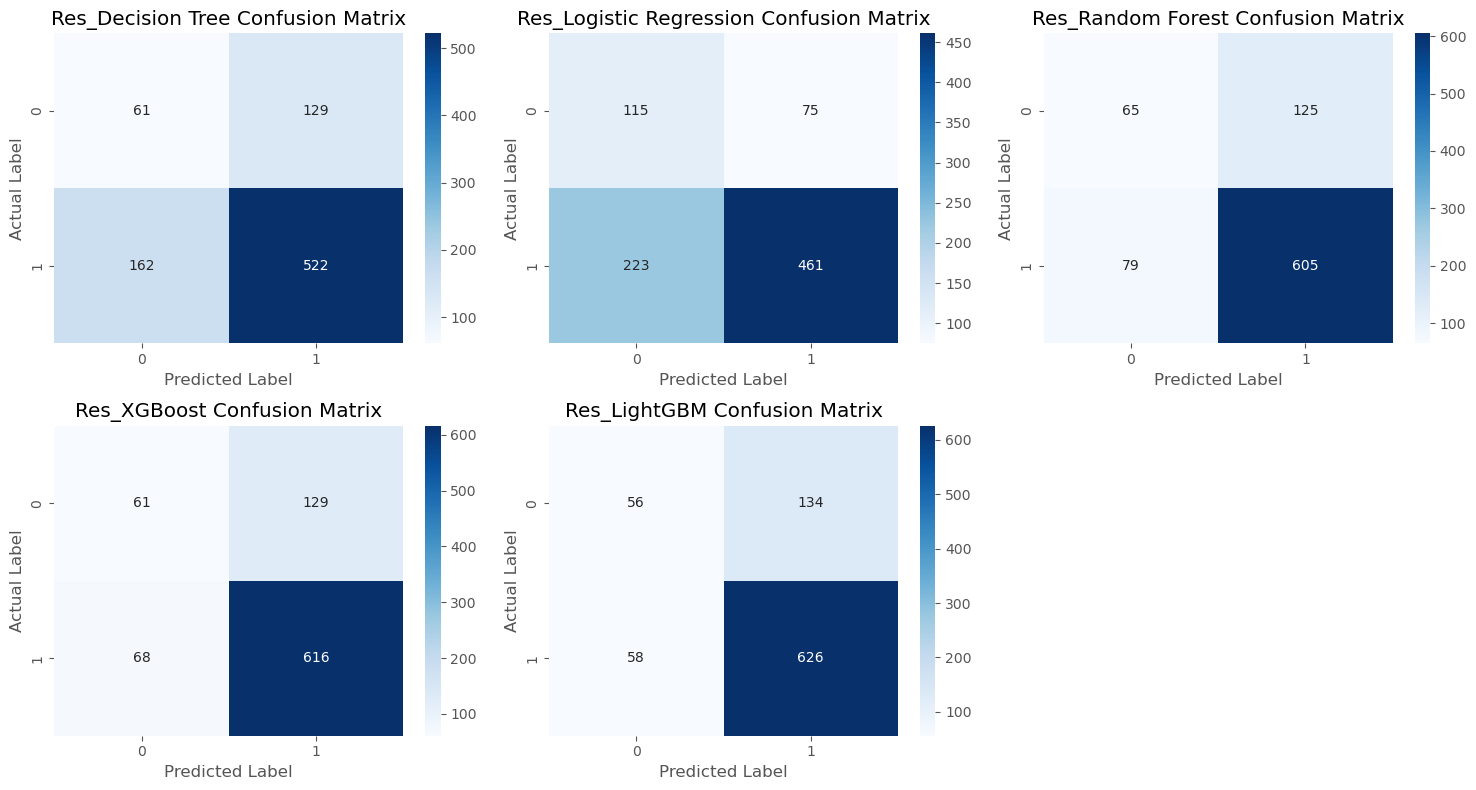

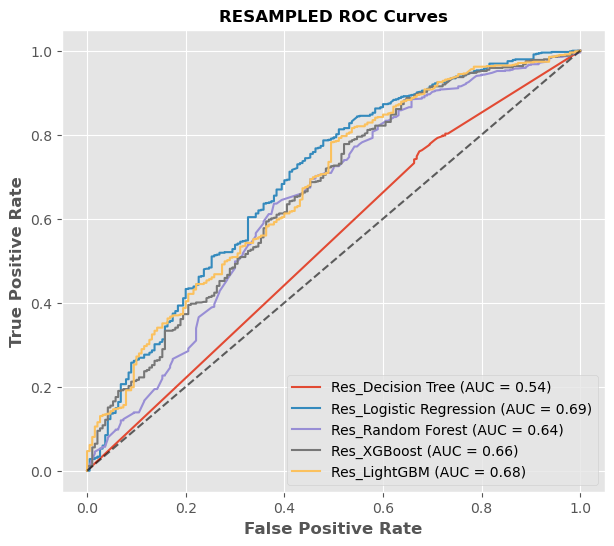

None

In [129]:
# using our function to iterate over and train & evaluate our models
res_results = evaluate_models_res(
    res_models,
    preprocessors,
    X_train,
    X_test,
    y_train,
    y_test,
)

display(res_results)

#### **OBSERVATIONS**
**From the results above:**
- `Decision Tree` remains the `weakest performer` overall with the `lowest ROC-AUC (0.54)` meaning it barely separates classes. it's `Accuracy (0.67) and F1 (0.78)` are lower than others and the confusion matrix shows `many misclassifications`.
- `Logistic Regression ROC-AUC is the highest (0.69)`, meaning it ranks predictions well. It` has very strong precision (0.86)` meaning it's good at avoiding false positives but `recall (0.67) is weaker`, meaning it misses more actual positives.
- `Random Forest's Accuracy (0.77) and F1 (0.86) are strong`. `Recall (0.88)` shows it catches most positives, `ROC-AUC (0.64)` is decent but not as strong as logistic regression. `Balanced performance but slightly below boosting methods`.
- `XGBoost's Accuracy (0.77), F1 (0.86), recall (0.90)` are high, very strong at catching positives. `ROC-AUC (0.66)` is fair. XGBoost performs better than Random Forest in recall and overall balance.
- `LightGBM` is the best overall performer. `Accuracy (0.78), F1 (0.87), recall (0.92) all highest`. `ROC-AUC (0.68)` is nearly as good as logistic regression. `Confusion matrix` shows it captures positives with fewer misses.


#### **NEXT STEPS FOR IMPROVEMENT**
**Hyperparameter Tuning**
- Perform hyperparameter tuning using` GridSearchCV` or `RandomizedSearchCV`.
> - Retrain `LightGBM` and `XGBoost` with hyperparameter tuning for improvement as they both have good/balanced overall performance

#### **HYPERPARAMETER TUNING AND EVALUATION**

- **Tuning LightGBM model using randomizedSearchCV**

In [130]:
%%time
# Defining parameter grids
param_dist = {
    "model__num_leaves": [31, 63, 127, ],
    "model__max_depth": [-1, 5, 10, 15],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__n_estimators": [100, 300, 500],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__min_child_samples": [10, 20, 30, 50]
}

# LightGBM pipeline
lgbm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessors),
    ("smote", SMOTE(random_state=42)),
    ("model", LGBMClassifier(objective="binary", random_state=12, verbosity=-1))
])

random_search = RandomizedSearchCV(
    lgbm_pipeline,
    param_distributions=param_dist,
    random_state=42,
    n_iter=50,
    scoring = "f1",
    cv=5,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_lgbm = random_search.best_params_
print("Best LGBM params:", best_lgbm)


Best LGBM params: {'model__subsample': 0.7, 'model__num_leaves': 31, 'model__n_estimators': 100, 'model__min_child_samples': 20, 'model__max_depth': 15, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.7}
CPU times: total: 35 s
Wall time: 22min 32s


- **Tuning XGBoost Model using GridSearchCV**

In [131]:
%%time
# Defining parameter grids
xgb_params = {
    "model__n_estimators": [300, 500],
    "model__max_depth": [7, 9],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 1.0],
    "model__colsample_bytree": [0.7, 1.0],
    "model__gamma": [-1, 0, 0.1]
}

# XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessors),
    ("smote", SMOTE(random_state=42)),
    ("model", XGBClassifier(objective="binary:logistic", random_state=12, eval_metric="logloss", use_label_encoder=False))
])

xgb_grid = GridSearchCV(
    xgb_pipeline,
    param_grid = xgb_params,
    scoring = "f1",
    cv=5,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best XGB params:", xgb_grid.best_params_)

Best XGB params: {'model__colsample_bytree': 0.7, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__subsample': 0.7}
CPU times: total: 1min 15s
Wall time: 52min 4s


- **Training and Evaluating The Models With Tuned Parameters**

In [132]:
# Defining the tuned models for training 
tuned_models = {
    "Tuned_XGBoost": XGBClassifier(objective="binary:logistic", random_state=12, use_label_encoder=False, eval_metric="logloss",
                                colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7),
    
    "Tuned_LightGBM": LGBMClassifier(objective="binary", random_state=12, verbose=-1,subsampl= 0.7, num_leaves=31, n_estimators=100,
                                   min_child_samples=20, max_depth=15, learning_rate=0.01, colsample_bytree=0.7)
}


In [133]:
# Optimizing our function to rename our results and to reduce the confusion matrix subplots as we are dealing with just 2 models now

def evaluate_models_tuned(models, preprocessors, X_train, X_test, y_train, y_test):

    results = []
    roc_curves = {}
    confusion_matrices = {}
    class_reports = {}

    for name, model in models.items():
        # pipeline
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessors),
            ("smote", SMOTE(random_state=42)),
            ("model", model)
        ])

        # Fit / train the model
        pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        # Computing Evaluation Metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        # Saving metric results
        results.append({
            "Model": name,
            "Accuracy": acc,
            "F1_Score": f1,
            "Precision": pre,
            "Recall": rec,
            "ROC-AUC": auc
        })

        # saving confusion matrix and classification report
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)
        class_reports[name] = classification_report(y_test, y_pred)

        # saving ROC results
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc)

        # converting metric results to a dataframe and display results
    df_results = pd.DataFrame(results).set_index("Model")
    print(f"\n TUNED EVALUATION METRICS RESULT \n")
    display(df_results)

        # displaying classification reports
    print(f"\n CLASSIFICATION REPORTS AFTER TUNING \n")
    for name, report in class_reports.items():
        print(f"{name}")
        print(f"{report}\n")

        # Plottting Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    axes = axes.flatten()
        
    for i, (name, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{name} Confusion Matrix")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("Actual Label")      
    plt.tight_layout()
    plt.show()      

        # Plotting ROC Curves
    plt.figure(figsize=(7,5))
    for name, (fpr, tpr, auc) in roc_curves.items():
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.title("TUNED ROC Curves", fontsize=12, fontweight="bold")
    plt.xlabel("False Positive Rate", fontweight="bold")
    plt.ylabel("True Positive Rate", fontweight="bold")
    plt.legend()
    plt.show()
    


 TUNED EVALUATION METRICS RESULT 



Accuracy  F1_Score  Precision    Recall   ROC-AUC
Model                                                            
Tuned_XGBoost   0.790618  0.872117   0.835341  0.912281  0.687504
Tuned_LightGBM  0.788330  0.871260   0.831341  0.915205  0.685442


 CLASSIFICATION REPORTS AFTER TUNING 

Tuned_XGBoost
              precision    recall  f1-score   support

           0       0.53      0.35      0.42       190
           1       0.84      0.91      0.87       684

    accuracy                           0.79       874
   macro avg       0.68      0.63      0.65       874
weighted avg       0.77      0.79      0.77       874


Tuned_LightGBM
              precision    recall  f1-score   support

           0       0.52      0.33      0.41       190
           1       0.83      0.92      0.87       684

    accuracy                           0.79       874
   macro avg       0.68      0.62      0.64       874
weighted avg       0.76      0.79      0.77       874




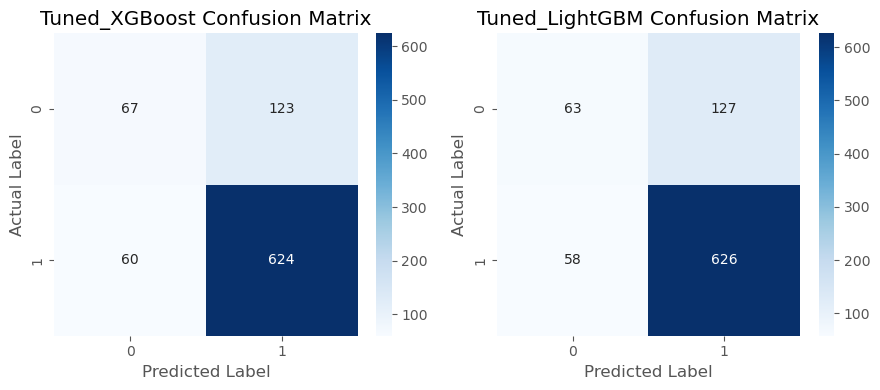

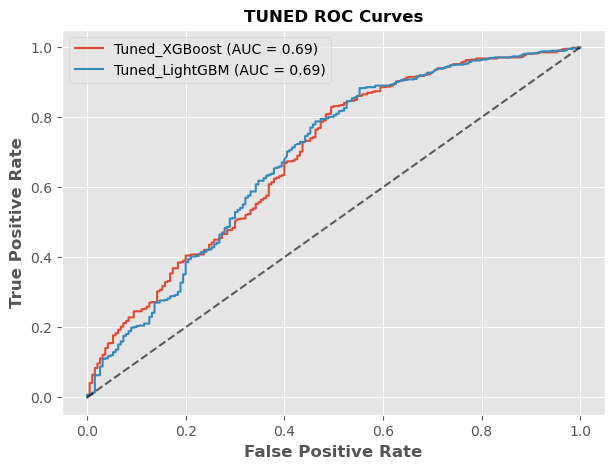

None

In [134]:
# using our function to iterate over and train & evaluate our models
tuned_results = evaluate_models_tuned(
    tuned_models,
    preprocessors,
    X_train,
    X_test,
    y_train,
    y_test,
)

display(tuned_results)

#### **OBSERVATIONS**
**From the results above:**
- `Both models` perform very similar across the board, with `XGBoost` having a slight edge in Accuracy, F1-score, Precision and ROC-AUC``.
- `Both models` are having a higher `Recall score (around 0.91)` than `Precision (around 0.83)`. This suggests that the models are better at identifying most of the `actual positive cases (high recall)` but are also more likely to incorrectly classify a `negative case as positive (lower precision)`. That is, they have a low number of false negatives, but a higher number of false positives.
- The `ROC-AUC` score are both around `0.69`. An AUC of `1.0` is a `perfect classifier` and `0.5` is a `random` one. An AUC of `0.69` indicates that the models have some `predictive power`, better than random guessing (0.5) but not excellent and ther's room for improvement. In many real-world classification tasks, an AUC ≥ 0.80 is usually considered strong.

#### **SUMMARY**
- Both `XGBoost and LightGBM` perform very similar, as their performance metrics and confusion matrices are almost identical.
- The models are much better at identifying the `positive class (high recall)` than the negative class. This suggests that the models are biased towards predicting the poositive class.
- The `ROC-AUC score of 0.69` indicates the models have decent but not outstanding predictive power.


#### **RECOMMENDATIONS FOR DEPLOYMENT**
- If the business goal is to minimize false negatives, then LightGBM is preferred because of its higher recall.
- If the business goal is to minimize false positives, then XGBoost is slightly better because of its higher precision and AUC.
- Since both are nearly identical, i would recommend XGBoost for deployment because:
> 1. It has a slightly stronger overall balance (better precision, f1-score, accuracy, and ROC-AUC).
> 2. The difference in recall is minimal (0.915 vs 0.912).

#### **FINAL MODEL**

In [135]:
model = XGBClassifier(objective="binary:logistic", random_state=12, use_label_encoder=False, eval_metric="logloss",
                      colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7)

In [136]:
final_model = Pipeline(steps=[
    ("preprocessor", preprocessors),
    ("smote", SMOTE(random_state=42)),
    ("model", model)
])

In [137]:
# fit it in the whole dataset
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loanamount', 'termdays',
                                                   'interest_rate(%)',
                                                   'num_prev_loans',
                                                   'avg_termdays',
                                                   'avg_prev_delay_days',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['loan_term',
                                                   'bank_account_type...
                               feature_types=None, feature_weights=None,
                               gamma=0, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### **FEATURE IMPORTANCE**

In [138]:
feature_names = (num_cols + list(preprocessors.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_cols)))

In [139]:
feature_names

['loanamount',
 'termdays',
 'interest_rate(%)',
 'num_prev_loans',
 'avg_termdays',
 'avg_prev_delay_days',
 'age',
 'loan_term_Long Term',
 'loan_term_Short Term',
 'bank_account_type_Current',
 'bank_account_type_Other',
 'bank_account_type_Savings',
 'bank_account_type_Unknown',
 'bank_name_clients_Access Bank',
 'bank_name_clients_Diamond Bank',
 'bank_name_clients_Eco Bank',
 'bank_name_clients_FCMB',
 'bank_name_clients_Fidelity Bank',
 'bank_name_clients_First Bank',
 'bank_name_clients_GT Bank',
 'bank_name_clients_Heritage Bank',
 'bank_name_clients_Keystone Bank',
 'bank_name_clients_Skye Bank',
 'bank_name_clients_Stanbic IBTC',
 'bank_name_clients_Standard Chartered',
 'bank_name_clients_Sterling Bank',
 'bank_name_clients_UBA',
 'bank_name_clients_Union Bank',
 'bank_name_clients_Unity Bank',
 'bank_name_clients_Unknown',
 'bank_name_clients_Wema Bank',
 'bank_name_clients_Zenith Bank',
 'employment_status_clients_Contract',
 'employment_status_clients_Permanent',
 'emplo

In [140]:
importance = model.feature_importances_
importance

array([0.0298188 , 0.01553495, 0.03672777, 0.04019804, 0.02098257,
       0.09190763, 0.0192727 , 0.02165844, 0.01416592, 0.01483905,
       0.08861991, 0.02838246, 0.02044129, 0.03059082, 0.05005288,
       0.02856087, 0.01989672, 0.02443389, 0.04541251, 0.03337918,
       0.        , 0.        , 0.02062092, 0.03774045, 0.        ,
       0.03314241, 0.02562249, 0.01752352, 0.        , 0.01547458,
       0.01740979, 0.0216855 , 0.        , 0.03697492, 0.        ,
       0.02064372, 0.01966801, 0.02833014, 0.03028712], dtype=float32)

In [141]:
sort = np.argsort(importance)[::-1]
sort

array([ 5, 10, 14, 18,  3, 23, 33,  2, 19, 25, 13, 38,  0, 15, 11, 37, 26,
       17, 31,  7,  4, 35, 22, 12, 16, 36,  6, 27, 30,  1, 29,  9,  8, 32,
       34, 21, 20, 28, 24])

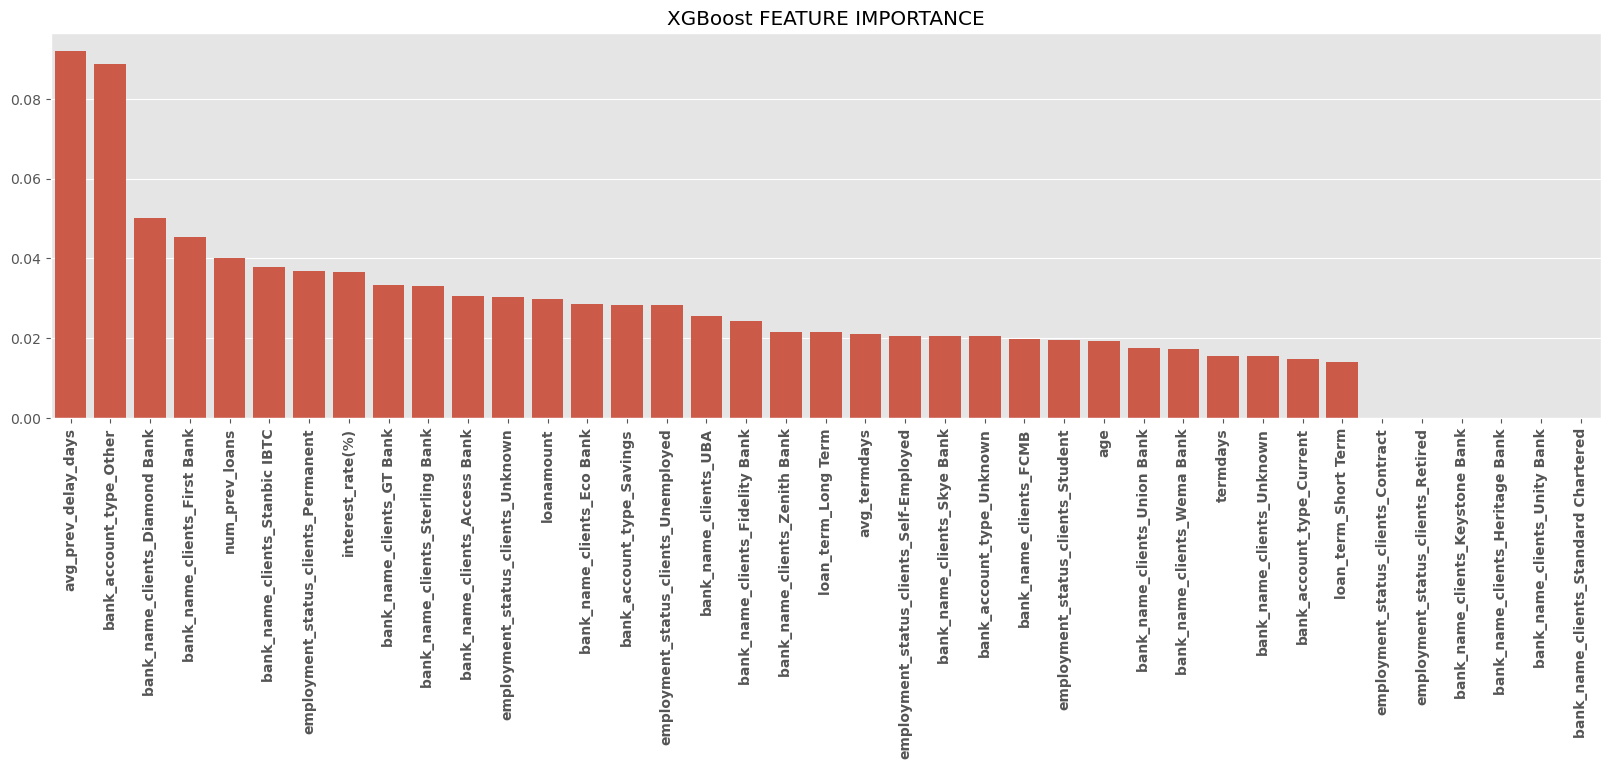

In [142]:
plt.figure(figsize=(20,5))
sns.barplot(x=np.array(feature_names)[sort], y=importance[sort])
plt.xticks(rotation=90, fontweight="bold")
plt.title("XGBoost FEATURE IMPORTANCE")

plt.show()

#### **SAVING OUR MODEL**

In [143]:
joblib.dump(final_model, "loan_default_predictor.pkl")

['loan_default_predictor.pkl']

#### **RECOMMENDATIONS FOR IMPROVEMENT**

- **Feature Engineering**
> Create new variables that are important for prediction
- **Feature Selection / Reduction**
> Use SHAP values or Permutation Importance to drop less important/noisy features.
- **Handle Class Imbalance (if applicable)**
> Results suggest there might be more positives than negatives (lots of true positives but fewer true negatives). Try using technique like ADASYN oversampling and see performance.
- **Hyperparameter Tuning**
> Extend parameters and perform deeper hyperparameter tuning. Try Bayesian Optimization or Optuna instead of grid search or randomized search.
- **Advanced Ensemble Strategies**
> Try Stacking/Blending two or more models (e.g Combine XGBoost + LightGBM) to leverage strength.
- **Data Preprocessing Enhancements**
> Outlier detection/removal.
- **Alternative Models**
> Try other models like CatBoost (performs very well with categorical features), e.t.c.
- **Threshold Adjustment**
> Adjust threshold to balance precision vs recall depending on business needs.
